In [1]:
import requests
import json
from datetime import datetime, timezone
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
from tqdm import tqdm
from meteostat import Point, Daily, Hourly

In [2]:
df = pd.read_csv("CleansedDataSets/JuneCleansed.csv")
df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df = df.sort_index()

In [3]:
start = df.index[500]
end = df.index[len(df)-200]

In [4]:
start

Timestamp('2022-06-13 22:48:13.656000')

In [5]:
end

Timestamp('2022-06-29 09:23:47.844000')

In [6]:
location = Point(30.513950, -97.734367)

In [7]:
data = Hourly(location, start, end)
data = data.fetch()

In [8]:
# df = df.loc[(df.index > '2021-12-03') & (df.index < end)]
df = df.loc[(df.index > start) & (df.index < end)]

In [9]:
df["temp"] = ""
df["dew point"] = ""
# df["relative humidity"] = ""
# df["hourly precip total"] = ""
# df["snow"] = ""
# df["wind dir"] = ""
# df["wind speed"] = ""
# df["peak wind gust"] = ""
df["avg sea level air pressure"] = ""

for i in tqdm(range(0,len(df))):
    index = df.index[i]
    date = index.round('60min').to_pydatetime()
    
    info = data.loc[str(date)]
    
    
    df["temp"][i] = info["temp"]
    df["dew point"][i] = info["dwpt"]
#     df["relative humidity"][i] = info["rhum"]
#     df["hourly precip total"][i] = info["prcp"]
#     df["snow"][i] = info["snow"]
#     df["wind dir"][i] = info["wdir"]
#     df["wind speed"][i] = info["wspd"]
#     df["peak wind gust"][i] = info["wpgt"]
    df["avg sea level air pressure"][i] = info["pres"]


  0%|                                                                                                                             | 0/159390 [00:00<?, ?it/s]SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159390/159390 [32:11<00:00, 82.51it/s]


In [10]:
df.to_csv("CleansedDataSets/JuneCleansedWWeather.csv")

34.0


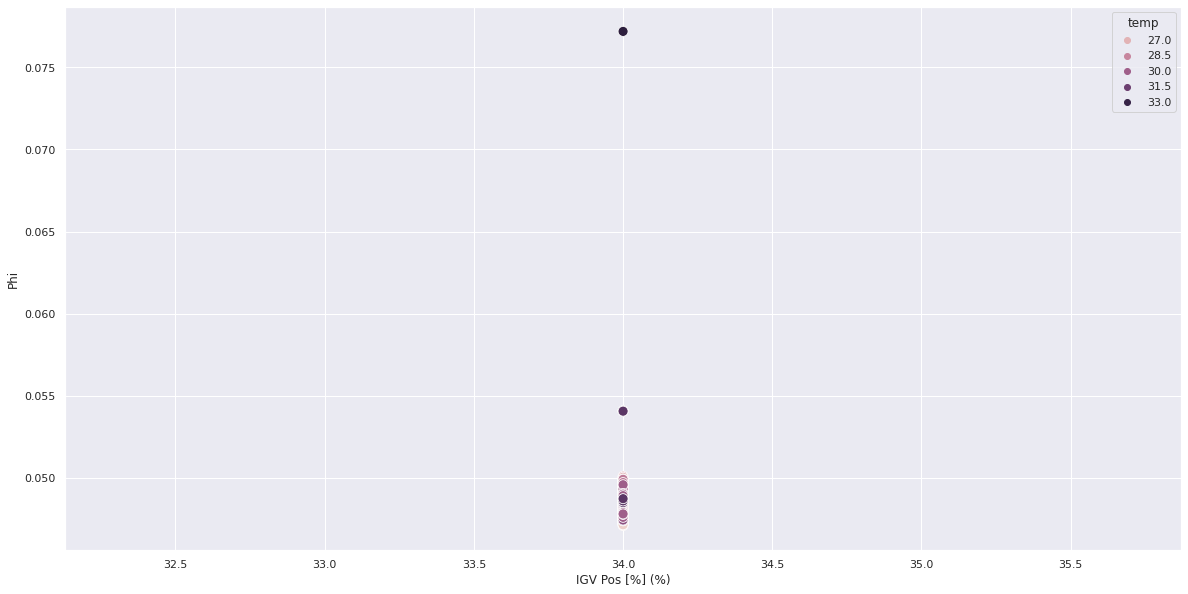

35.0


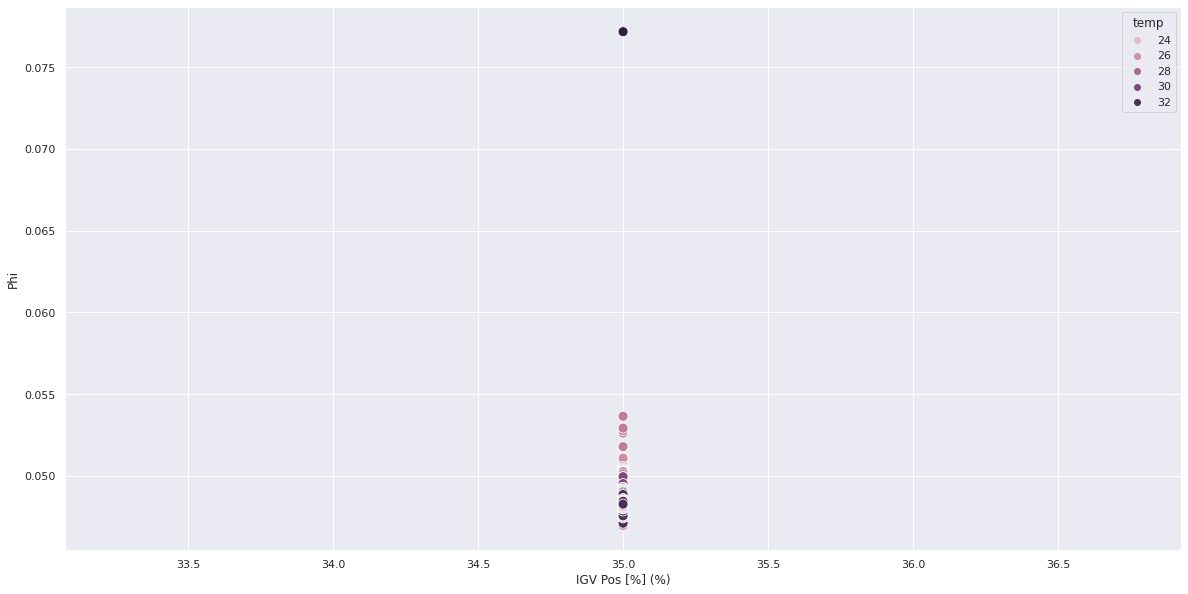

36.0


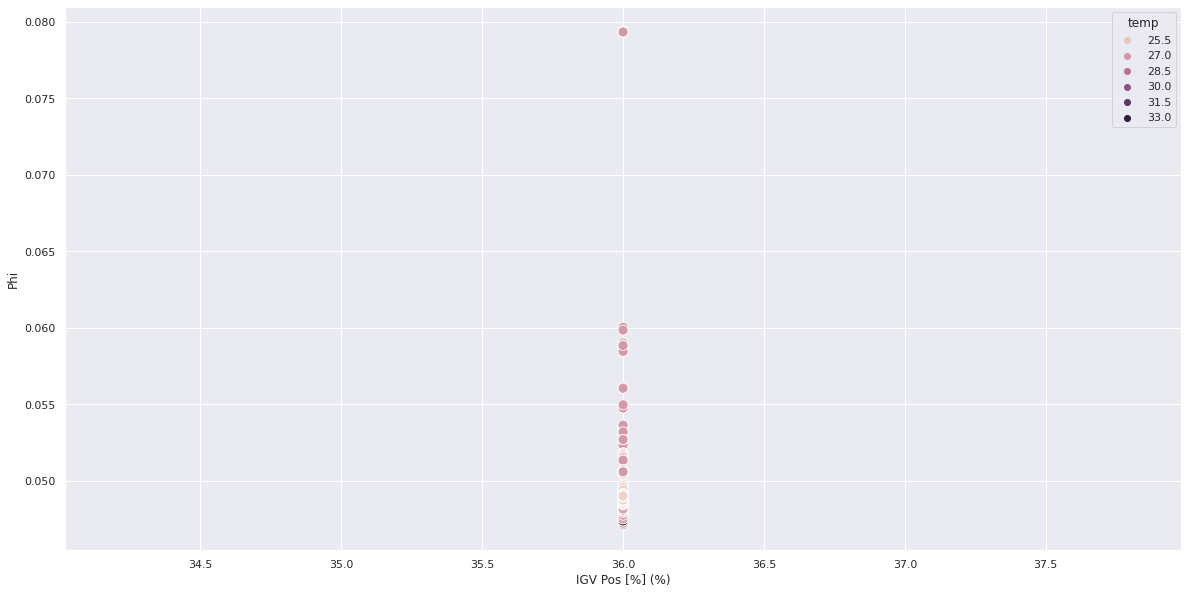

37.0


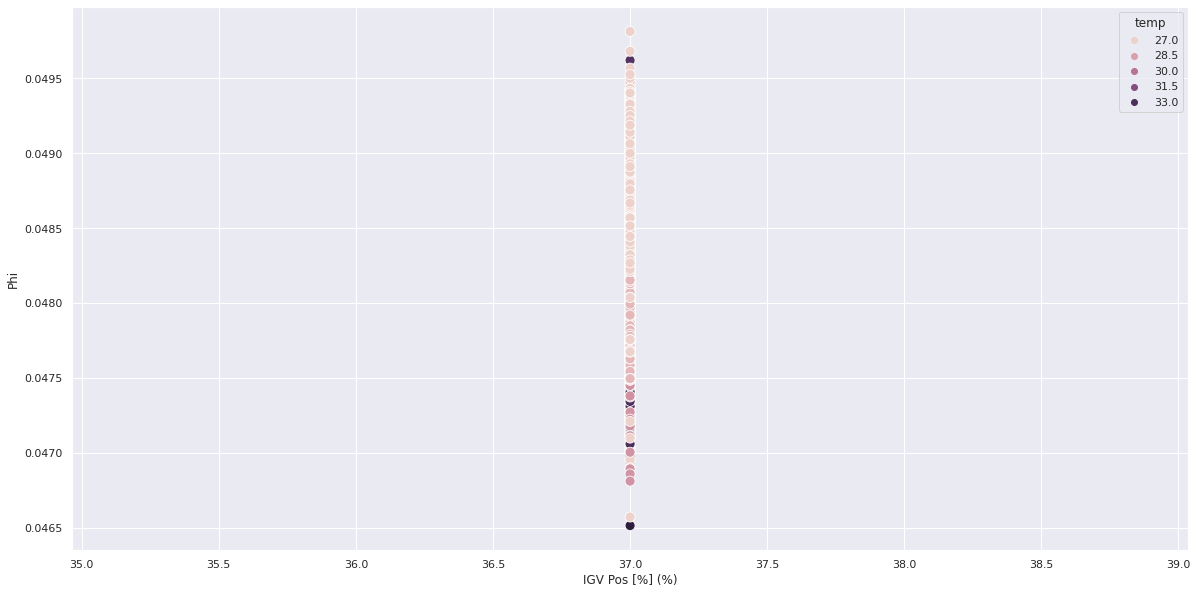

38.0


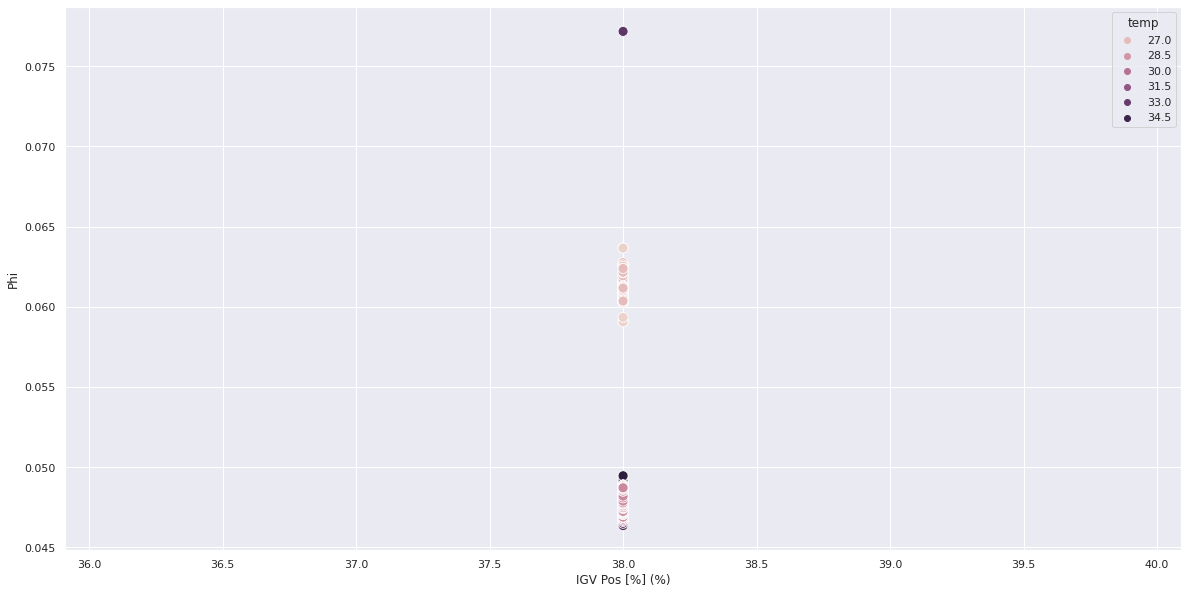

39.0


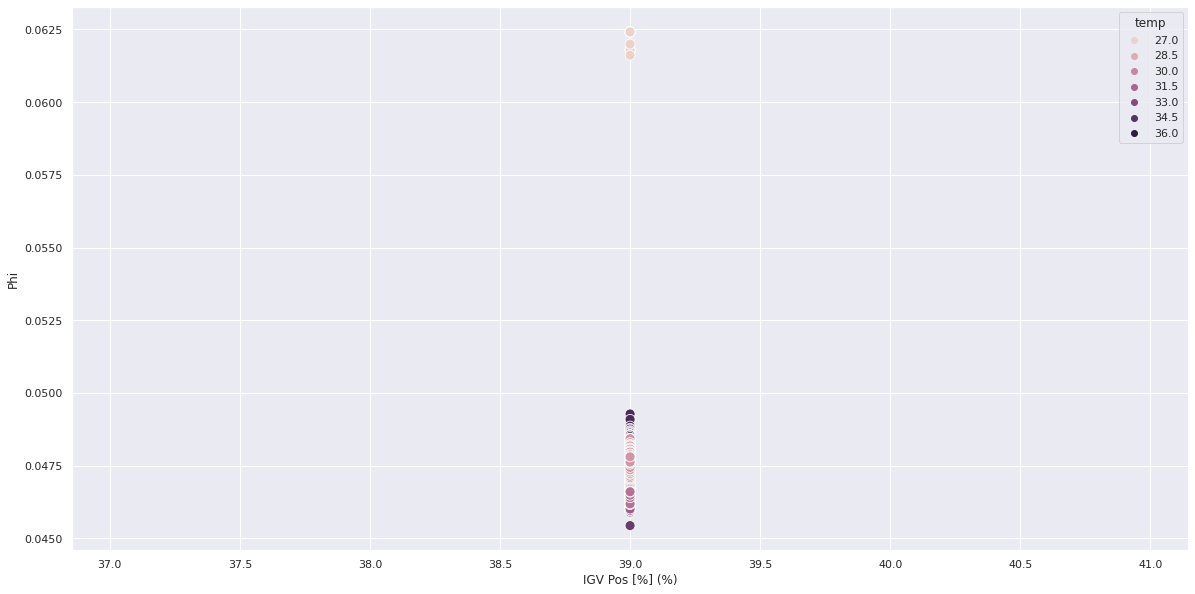

40.0


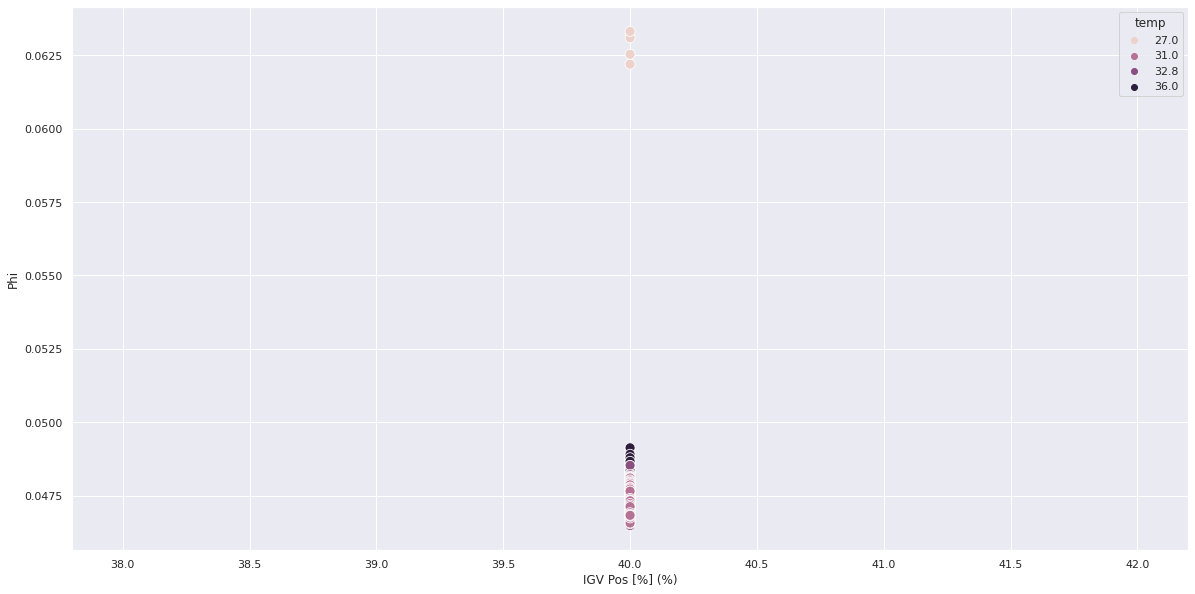

41.0


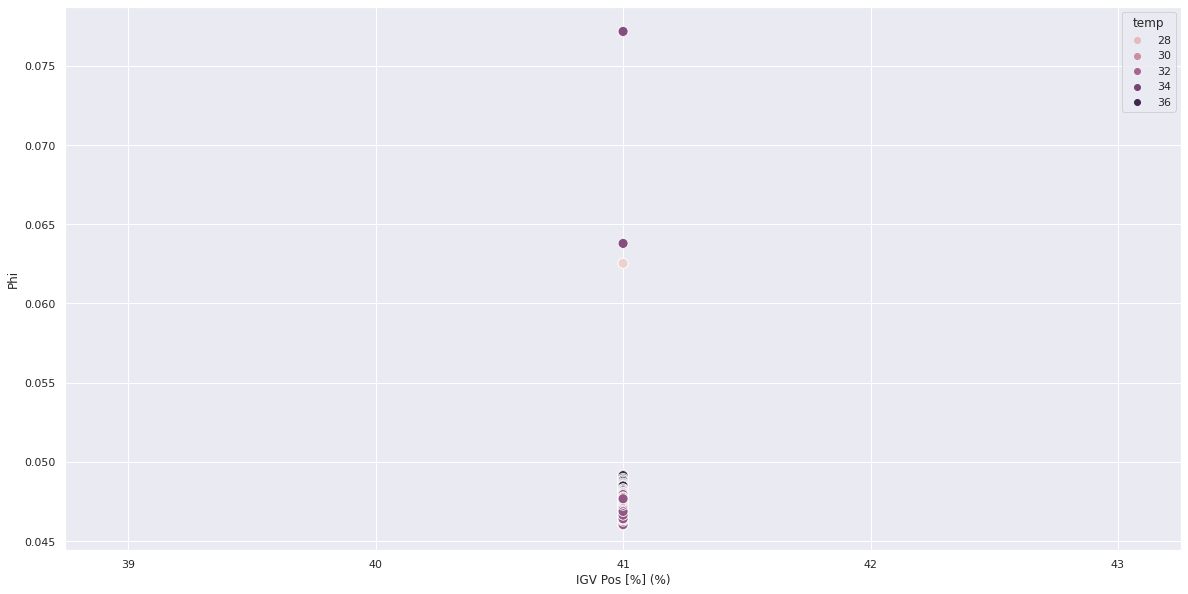

44.0


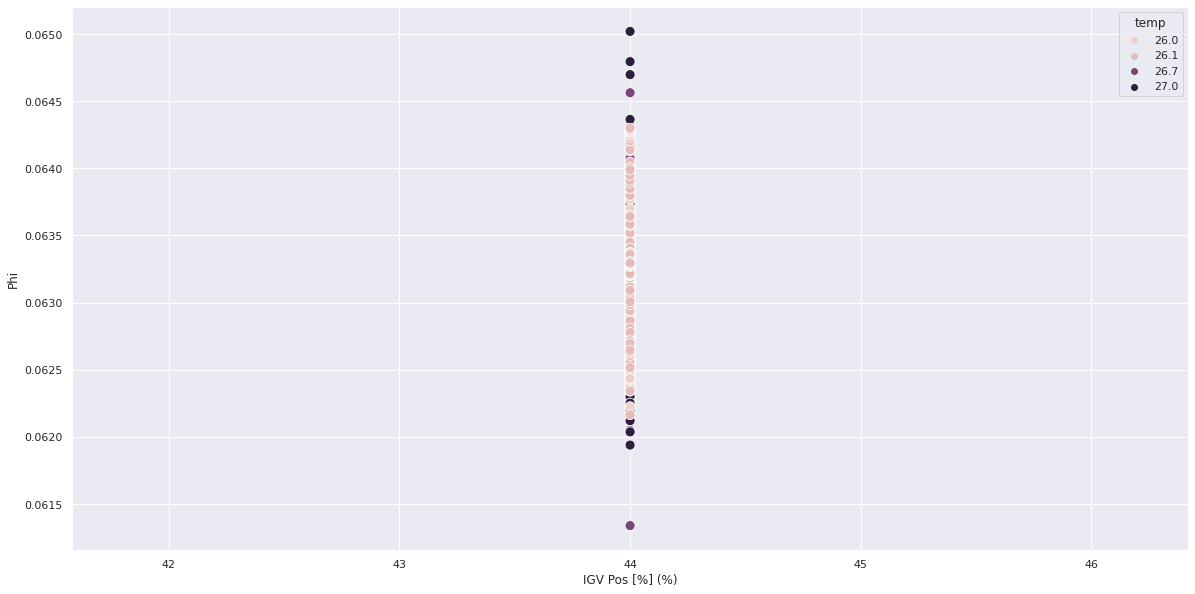

45.0


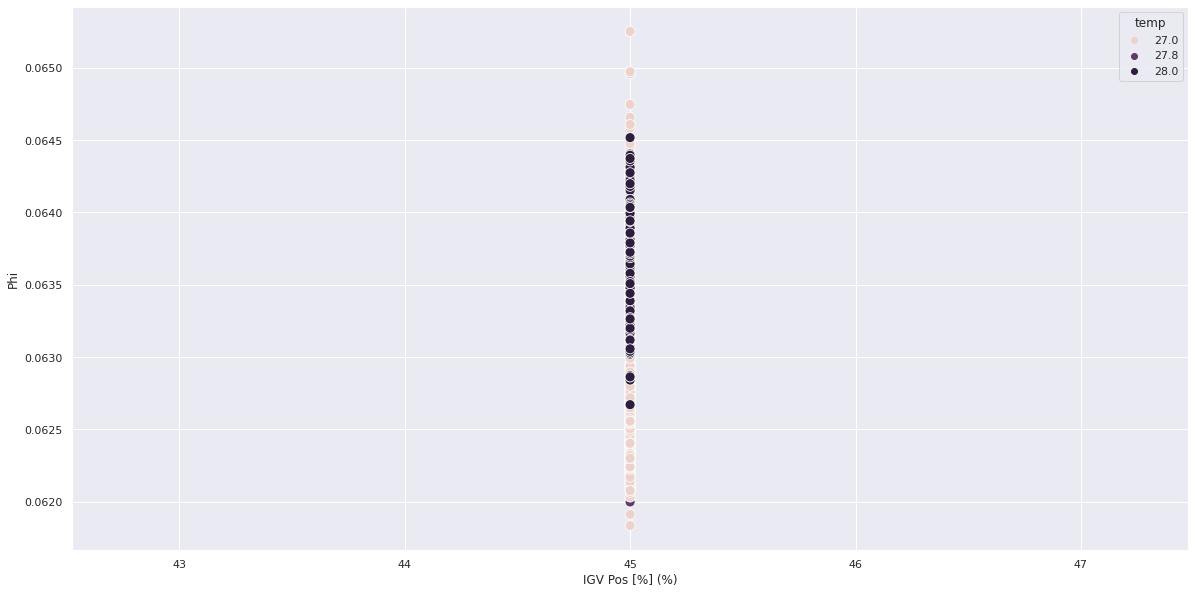

46.0


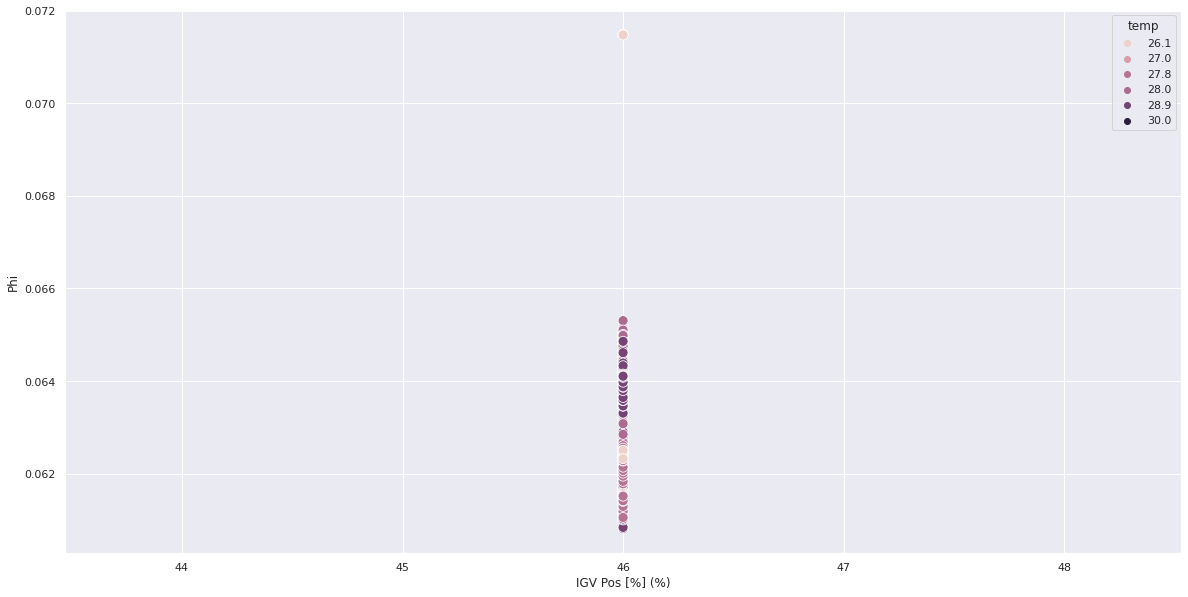

47.0


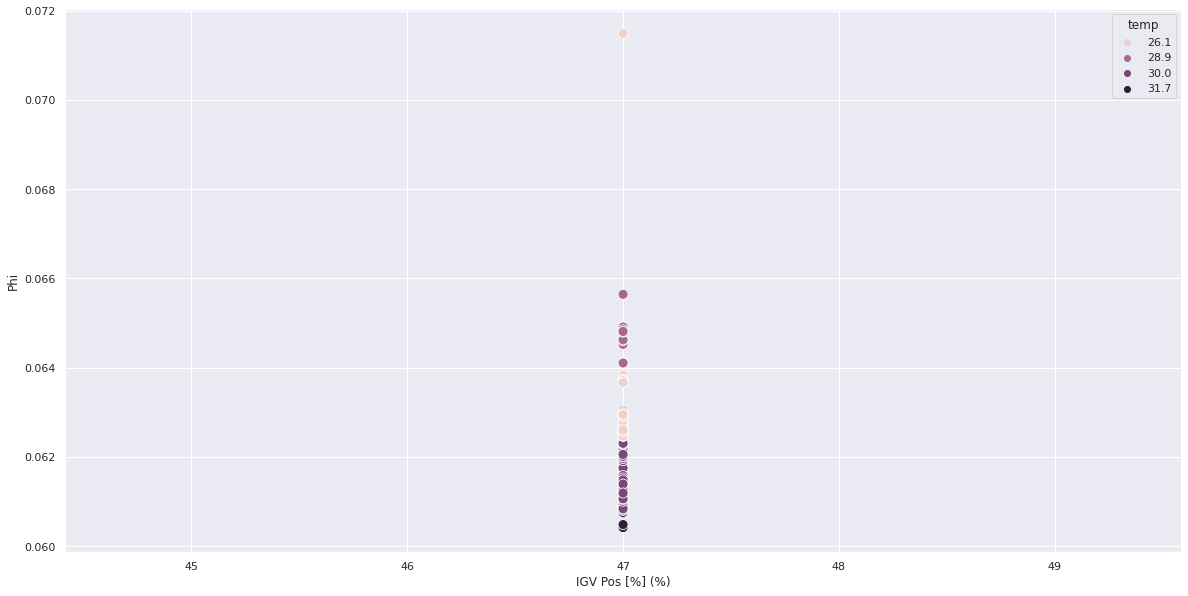

48.0


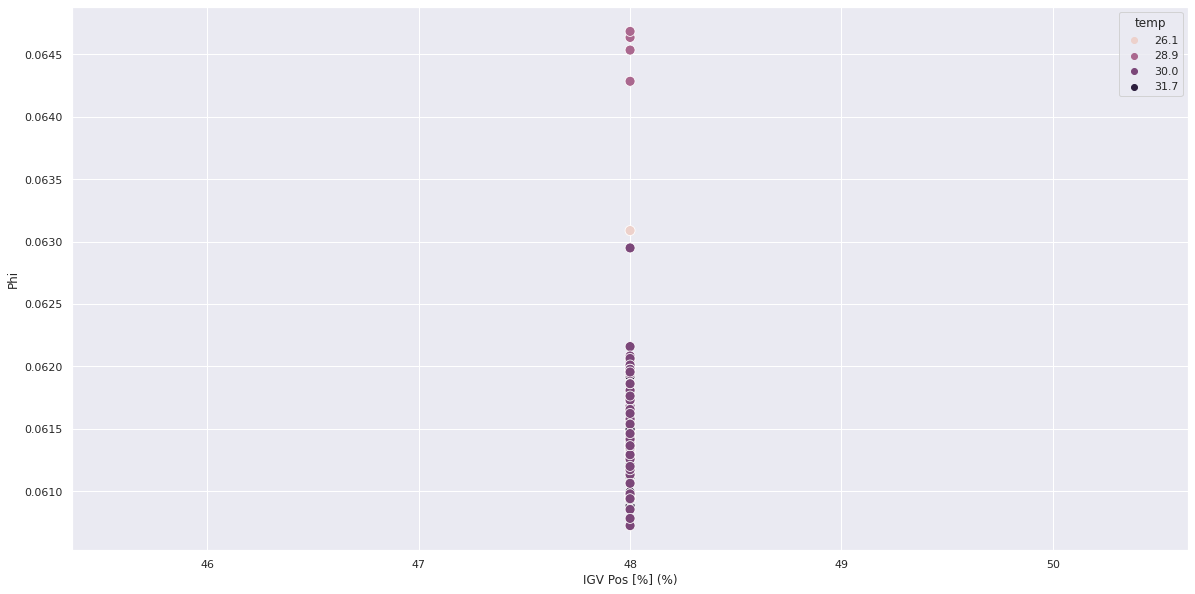

49.0


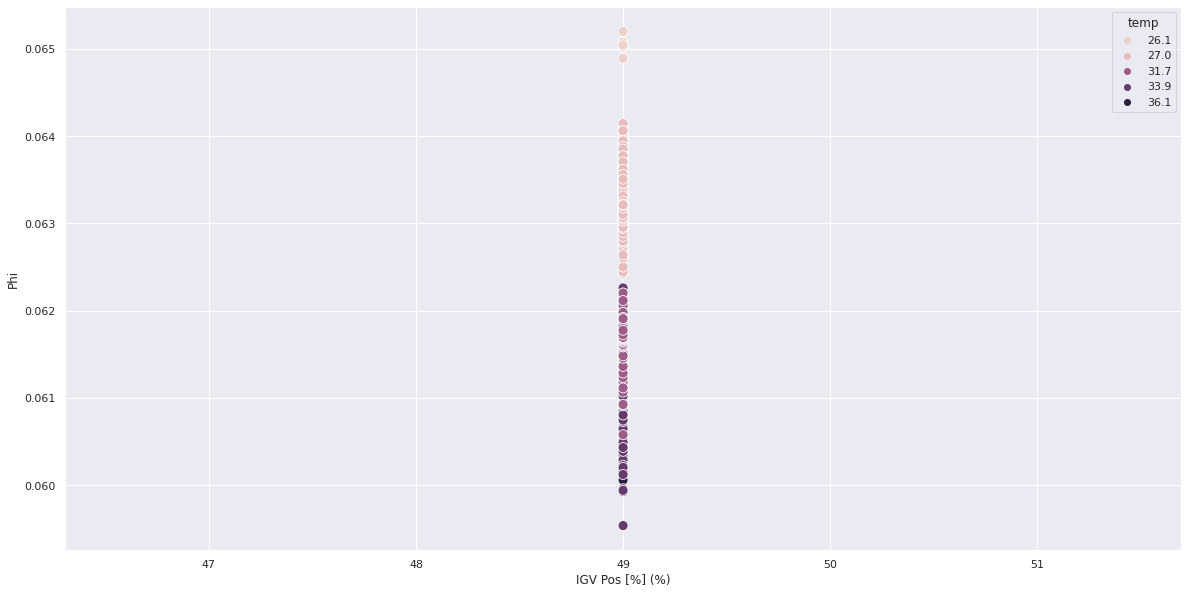

50.0


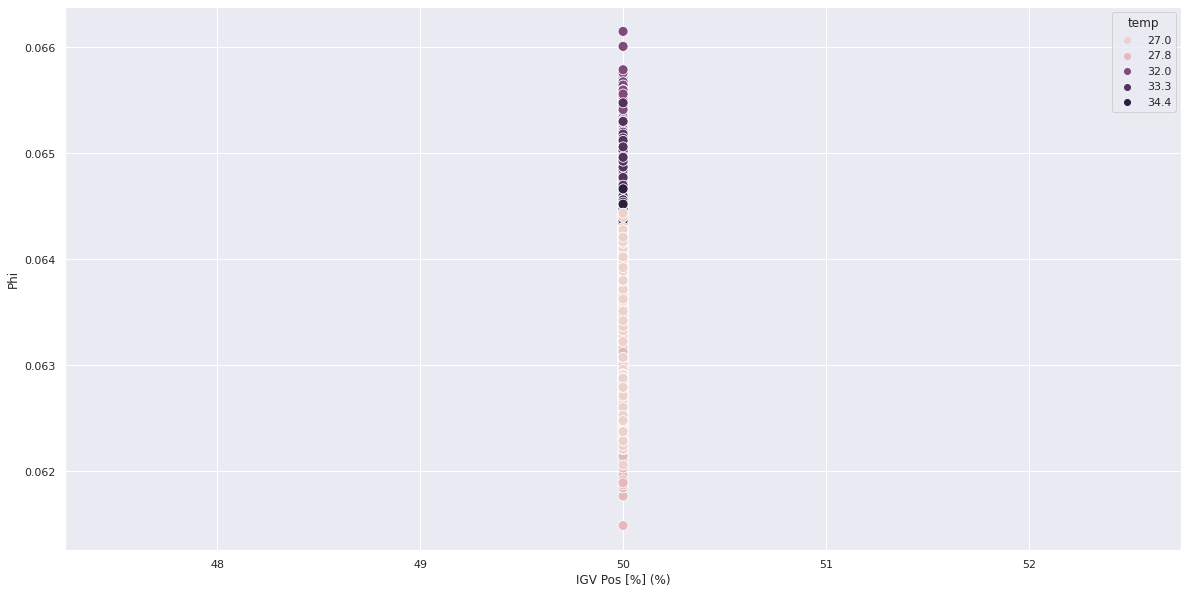

51.0


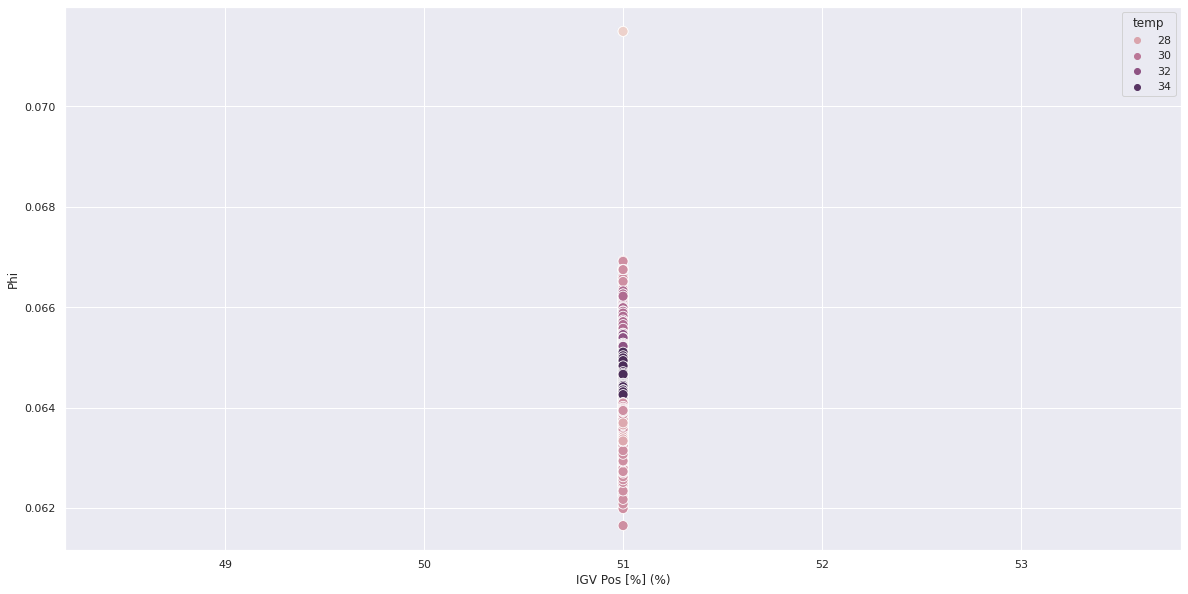

52.0


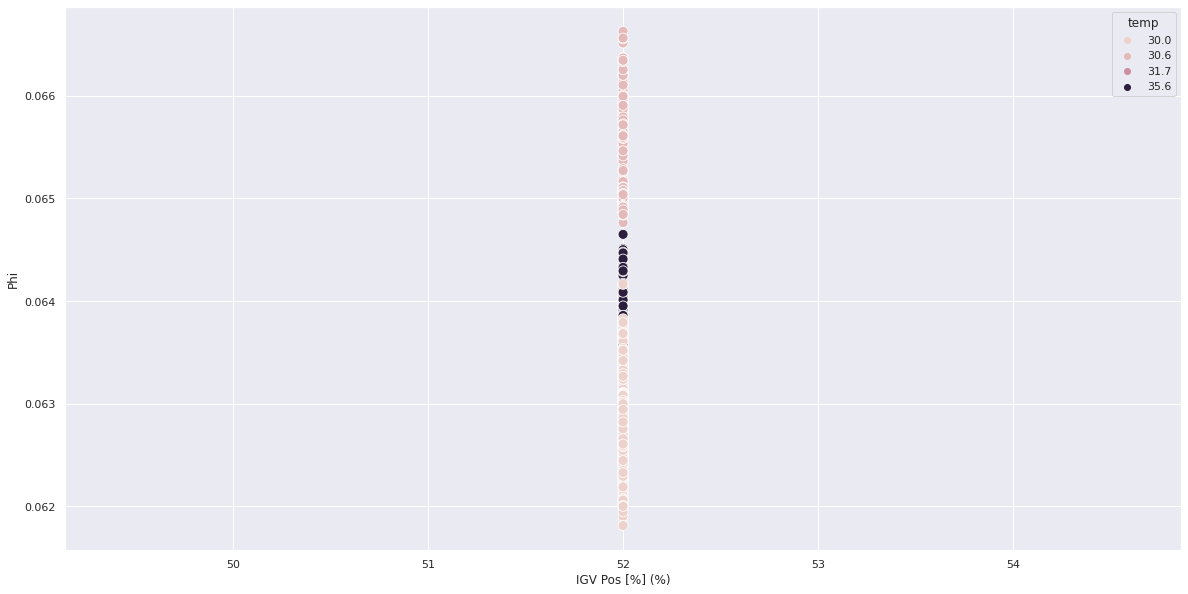

53.0


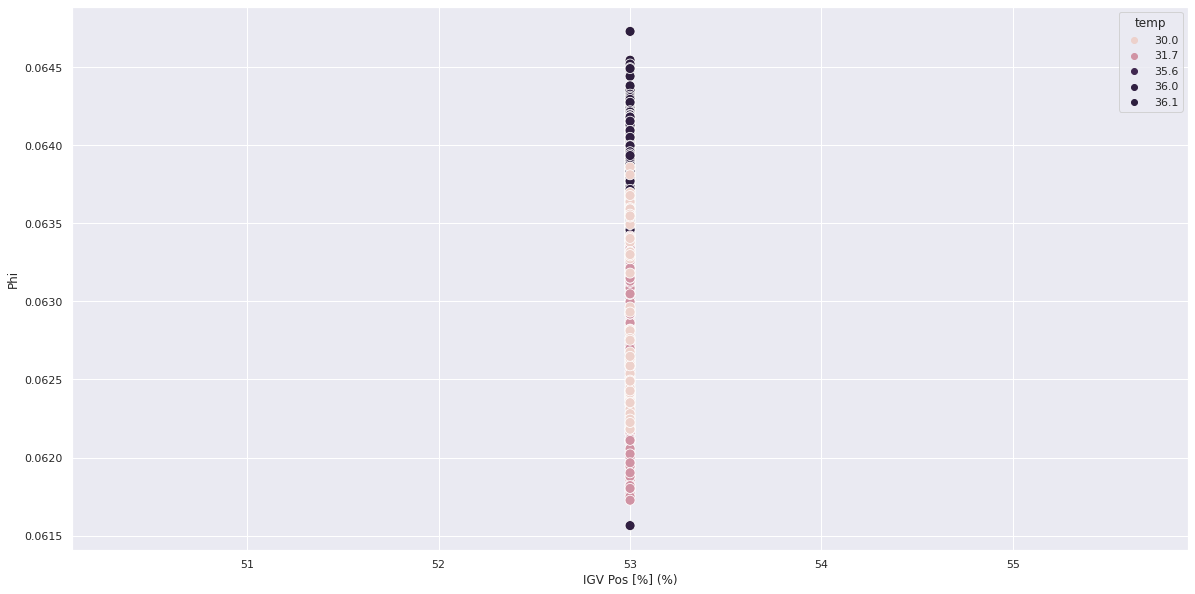

54.0


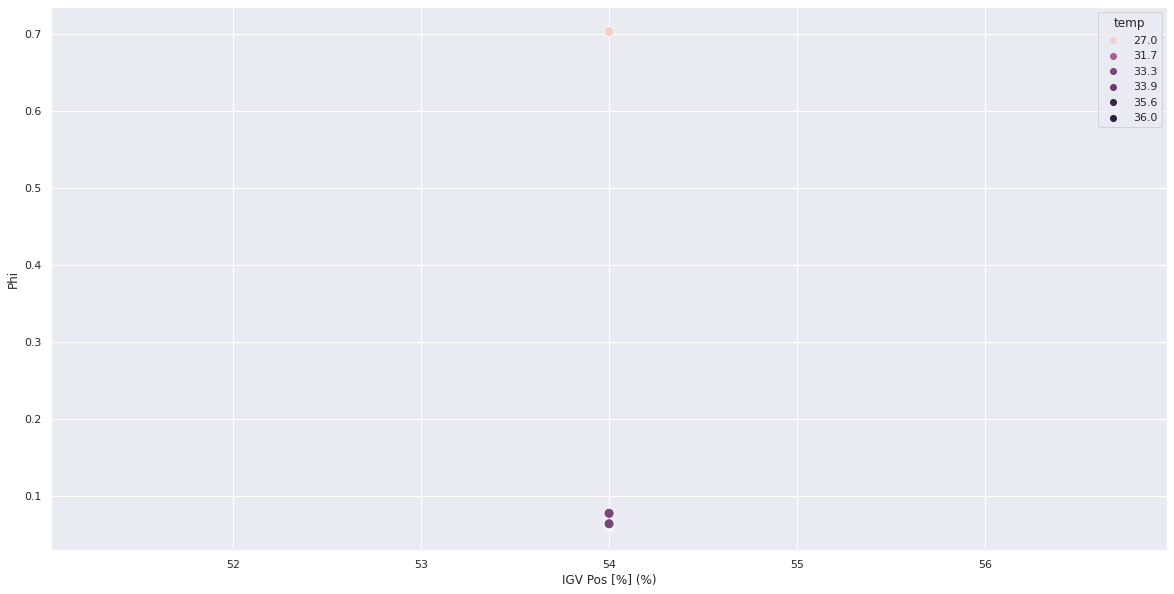

82.0


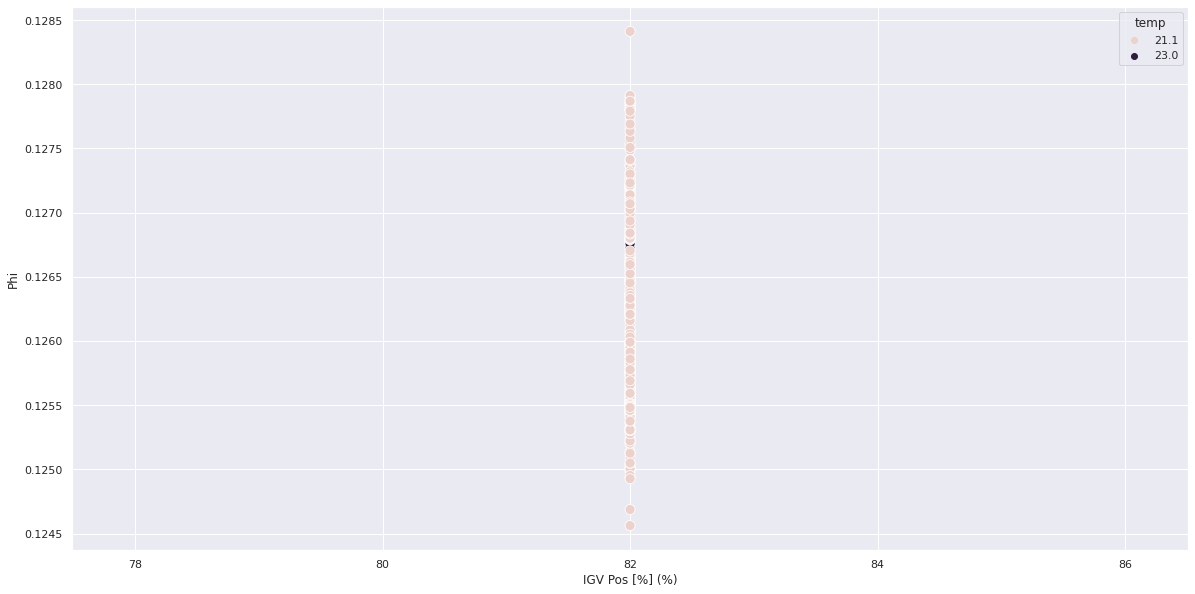

83.0


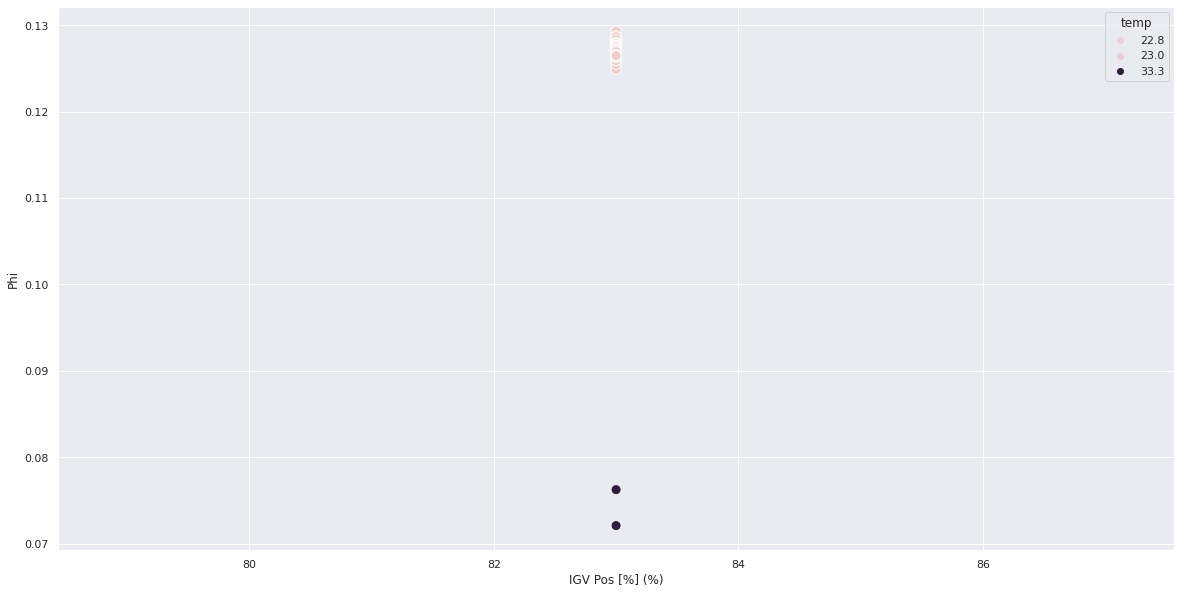

84.0


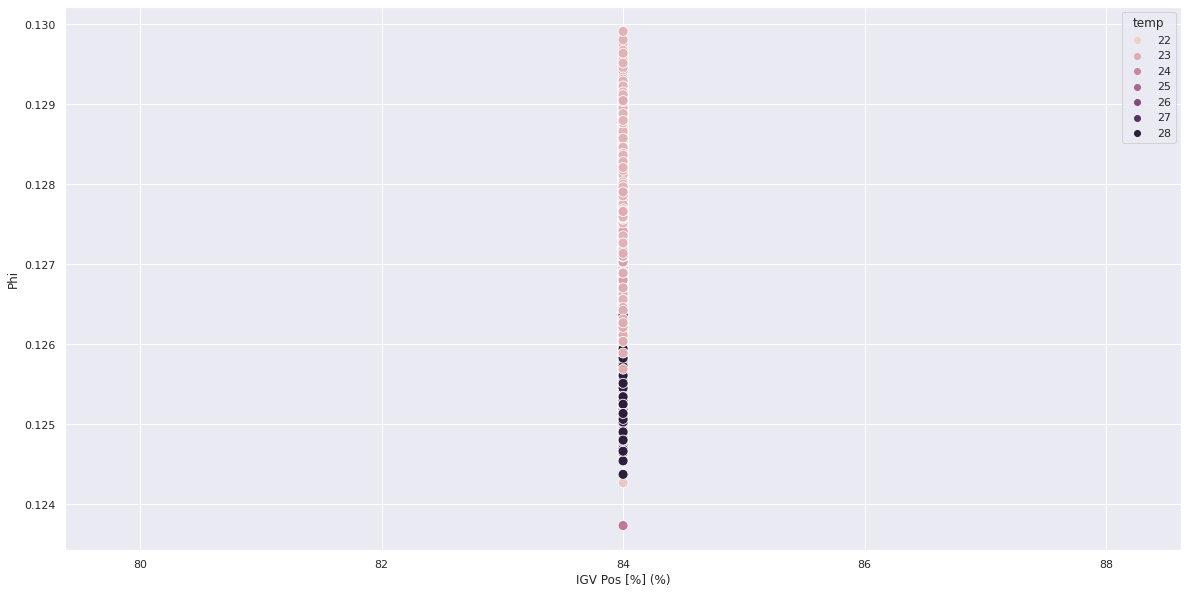

85.0


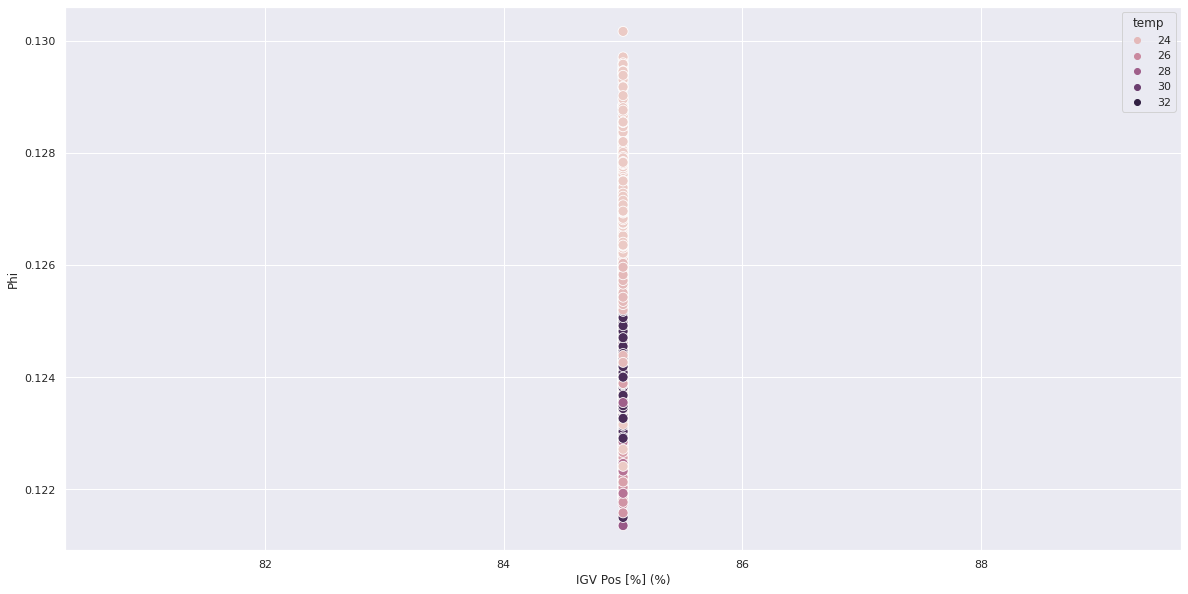

86.0


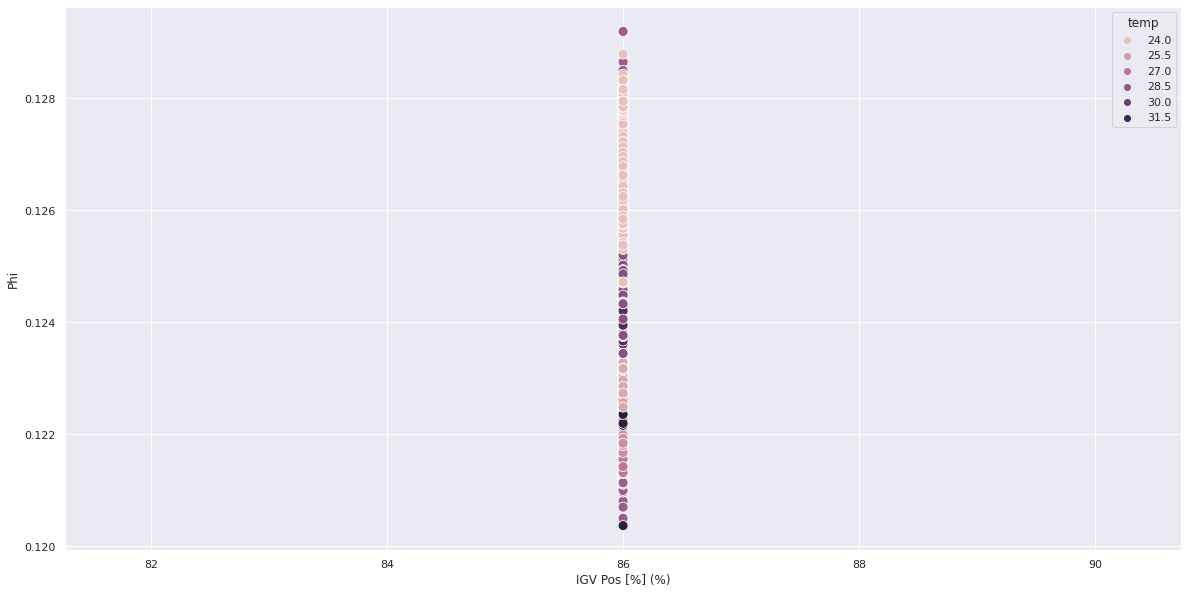

87.0


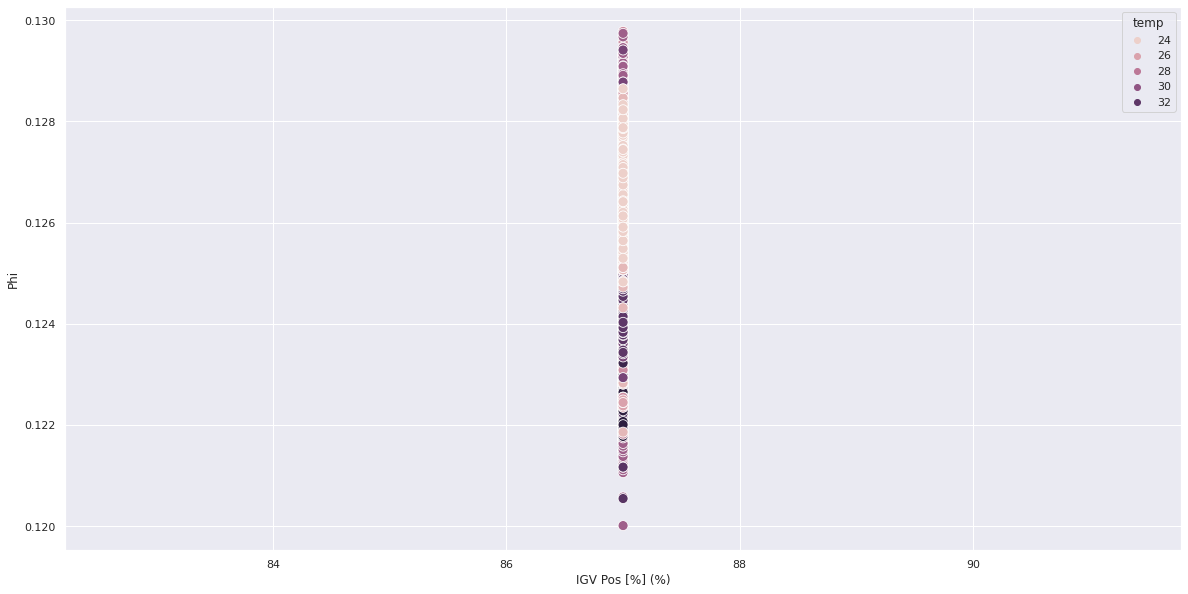

88.0


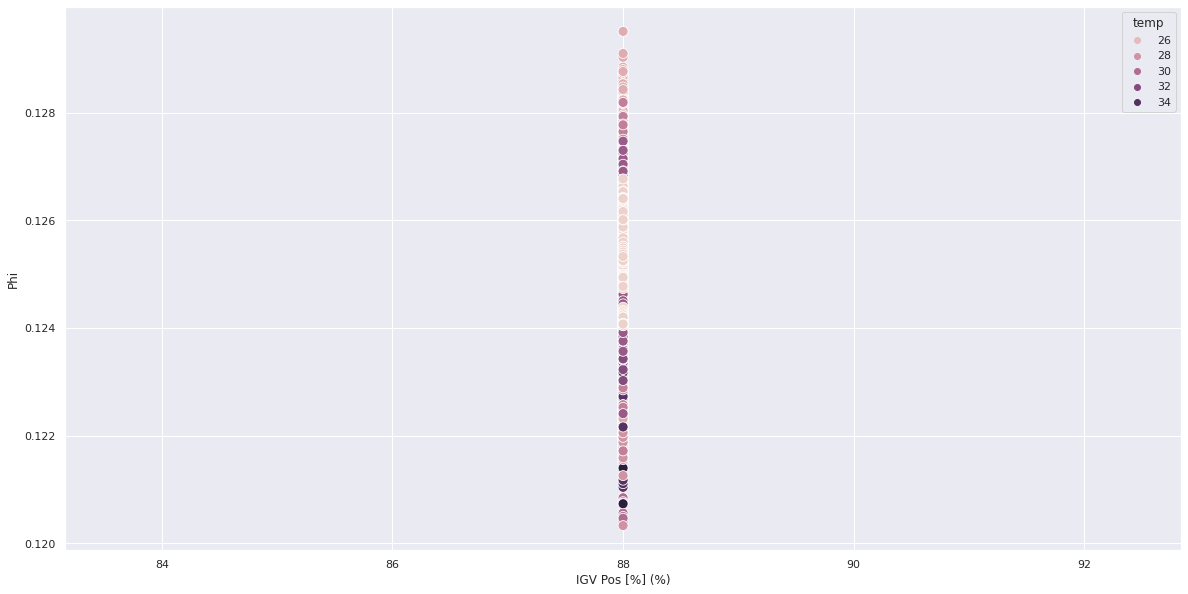

89.0


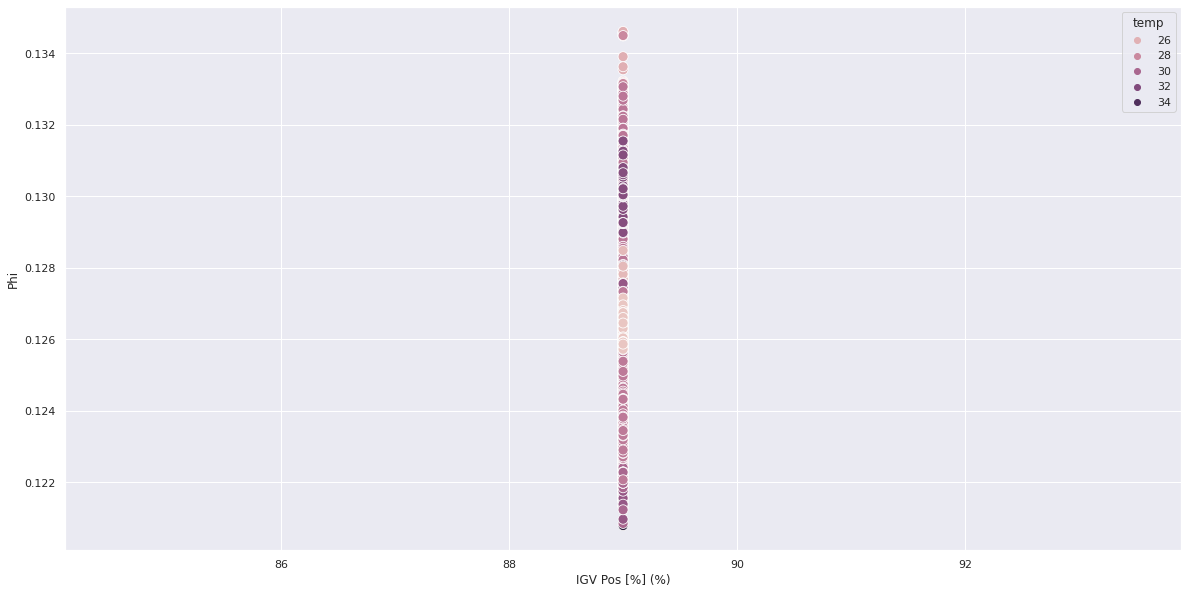

90.0


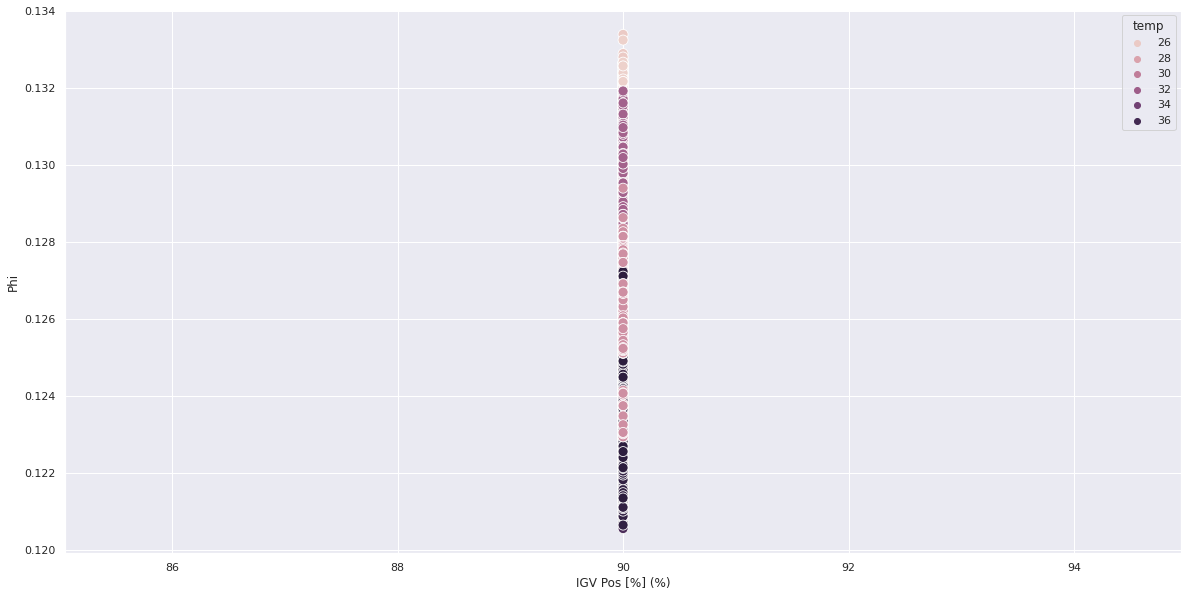

91.0


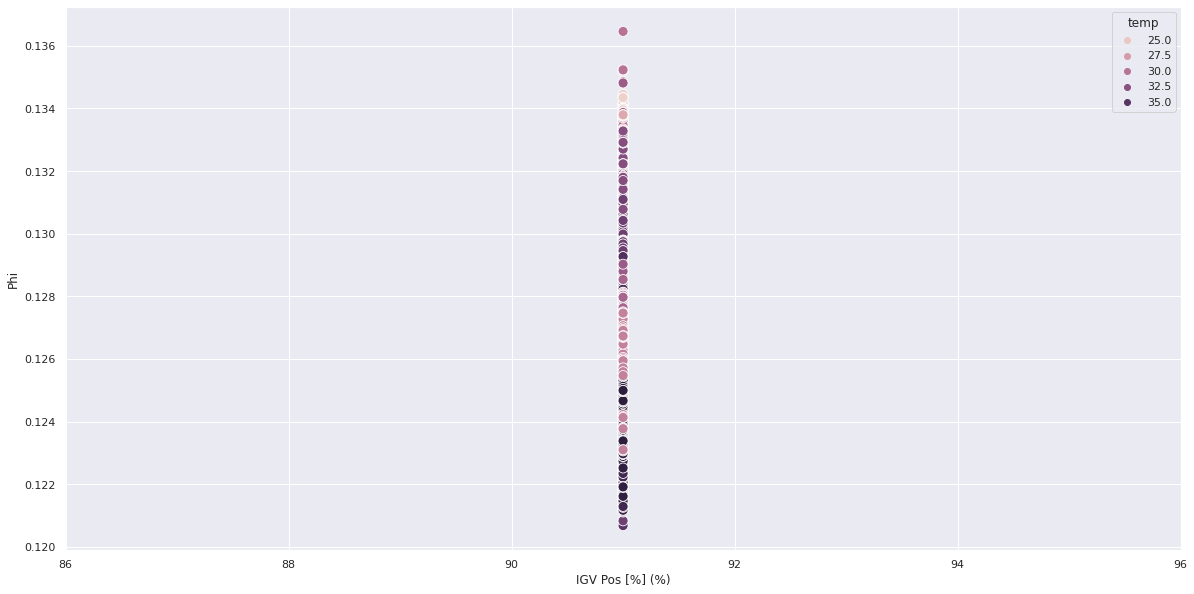

92.0


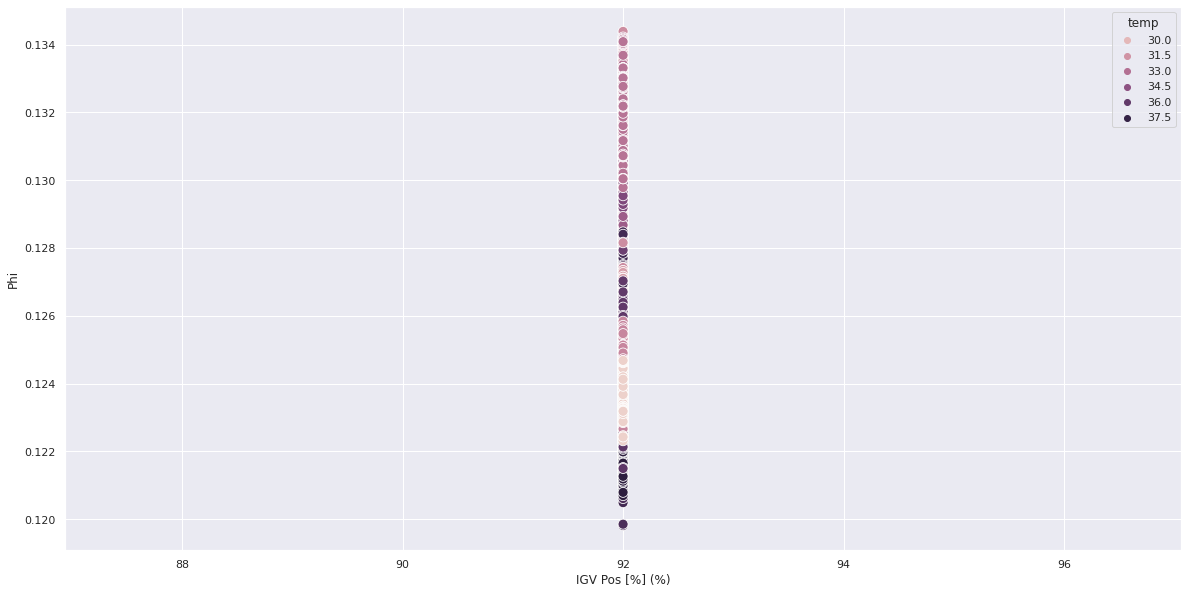

93.0


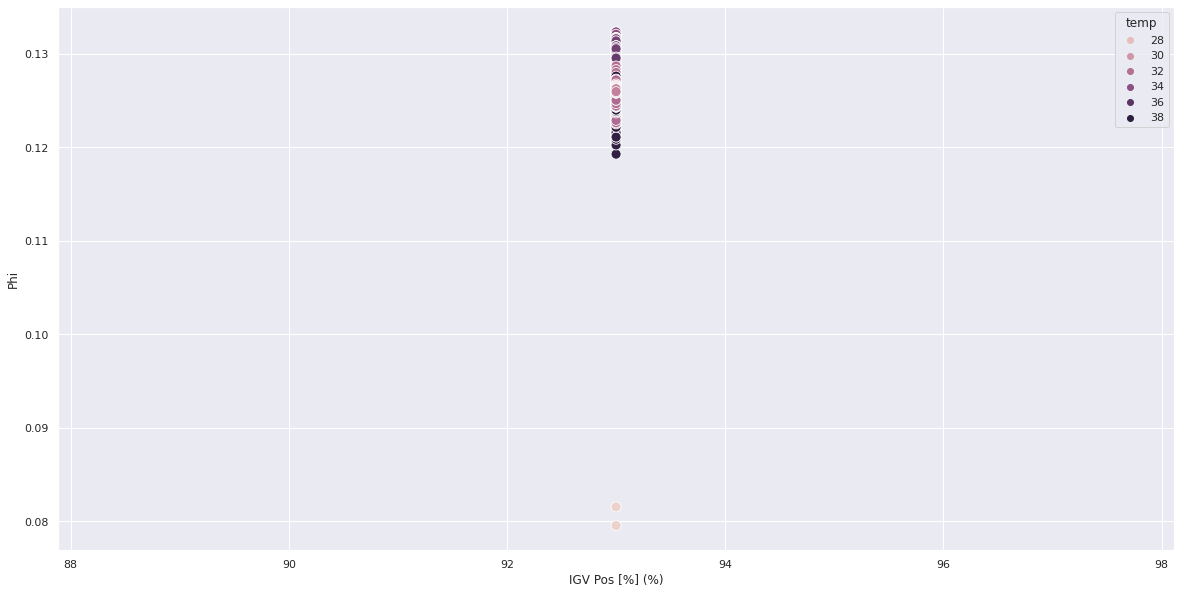

94.0


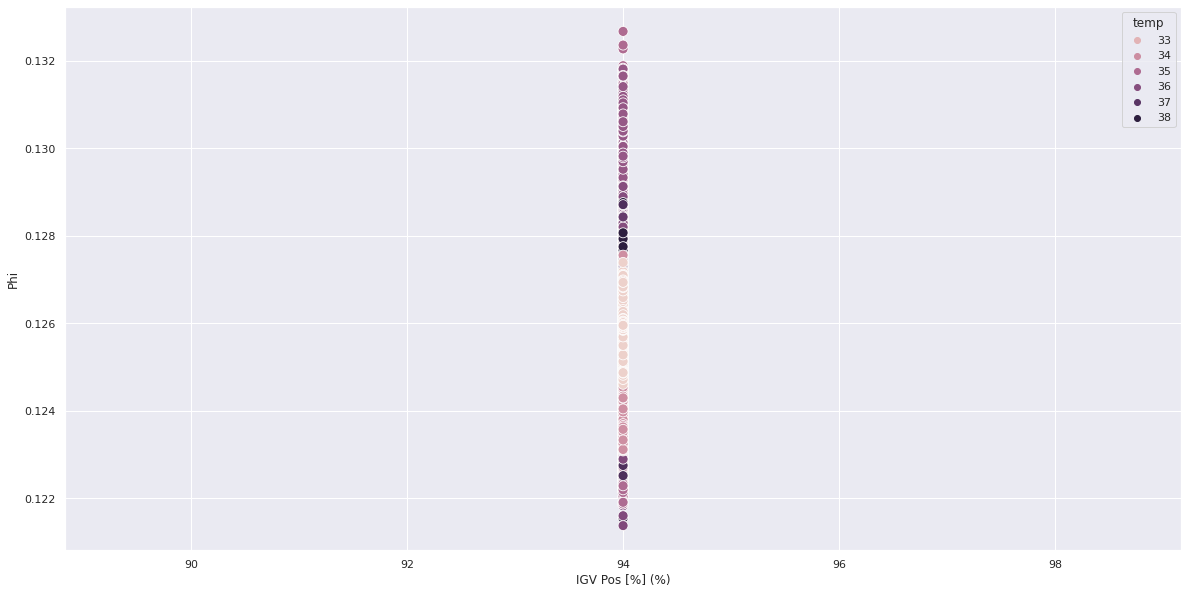

95.0


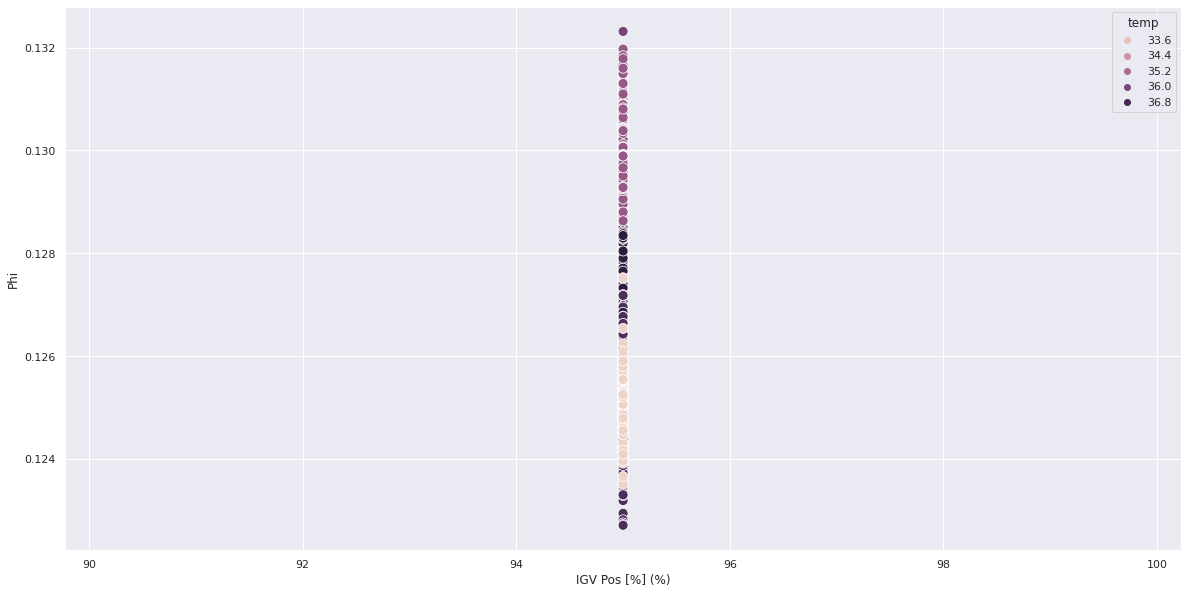

96.0


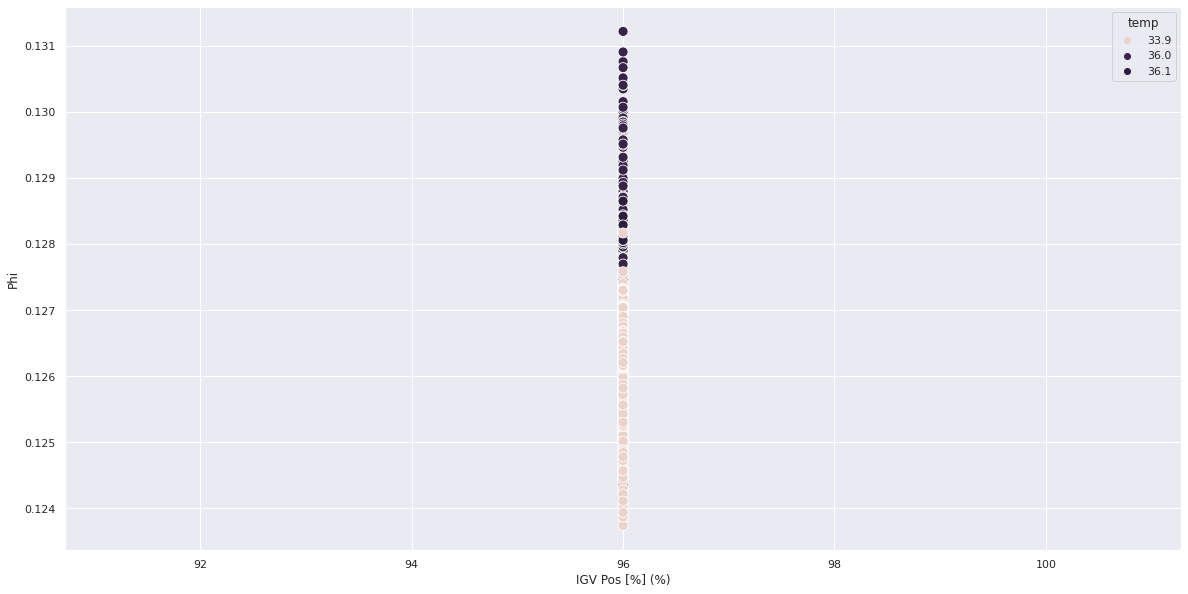

In [11]:
unique = df.groupby(['IGV Pos [%] (%)']).size().reset_index()
unique = unique.rename(columns={0:'Count'})
for i in range(0, len(unique)):
            if(unique['Count'][i]>100):
                IGV = unique["IGV Pos [%] (%)"][i]
#                 VVD = unique["VDV Pos [%] (%)"][i]
                print(IGV)
                wholedf = df.loc[(df["IGV Pos [%] (%)"] == IGV)]
                sns.scatterplot(data=wholedf, x="IGV Pos [%] (%)", y="Phi", hue="temp", s=100)
                plt.show()

0.0


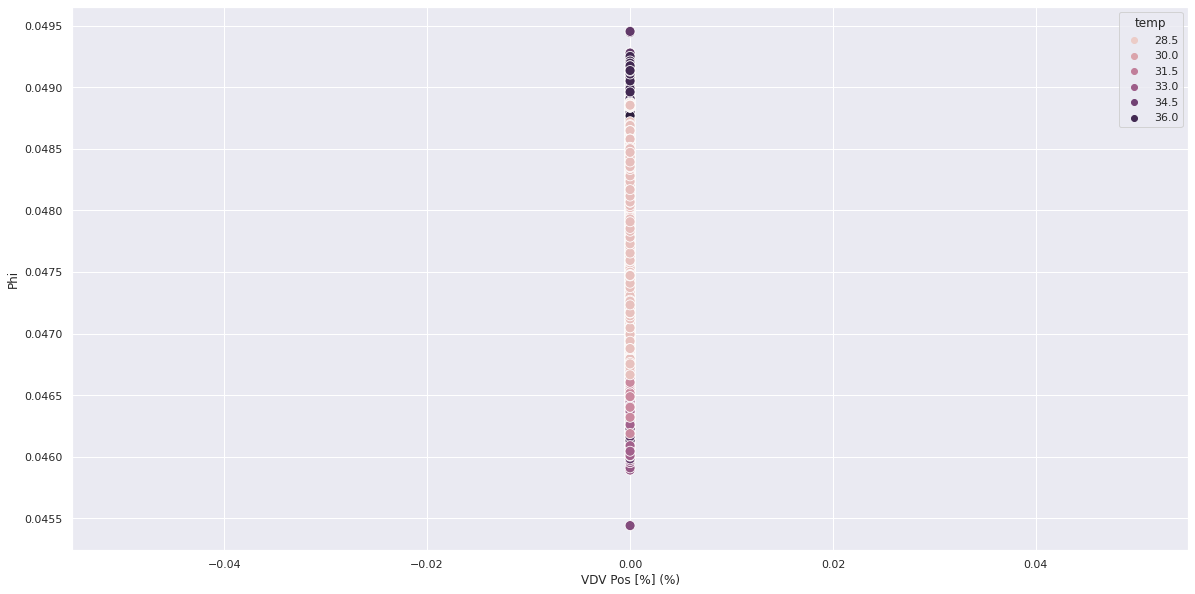

1.0


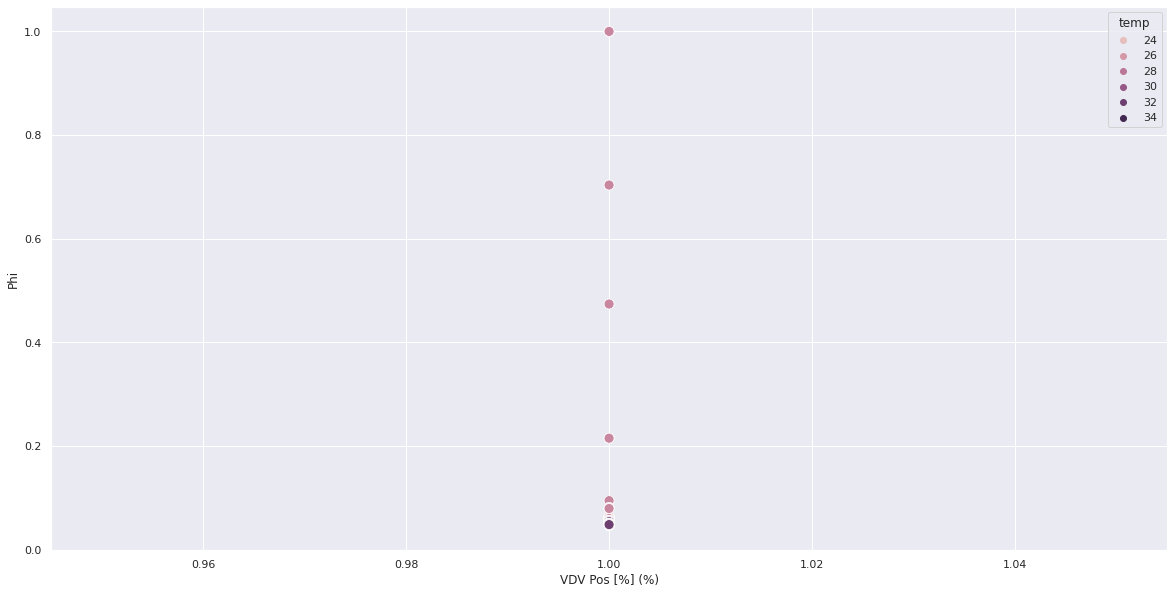

16.0


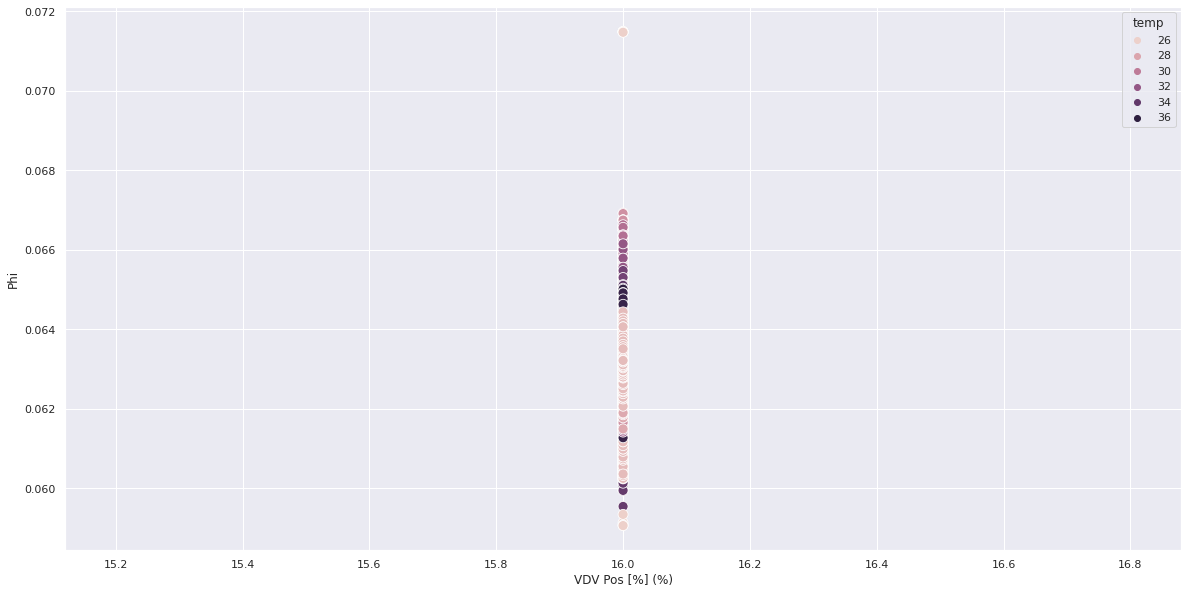

85.0


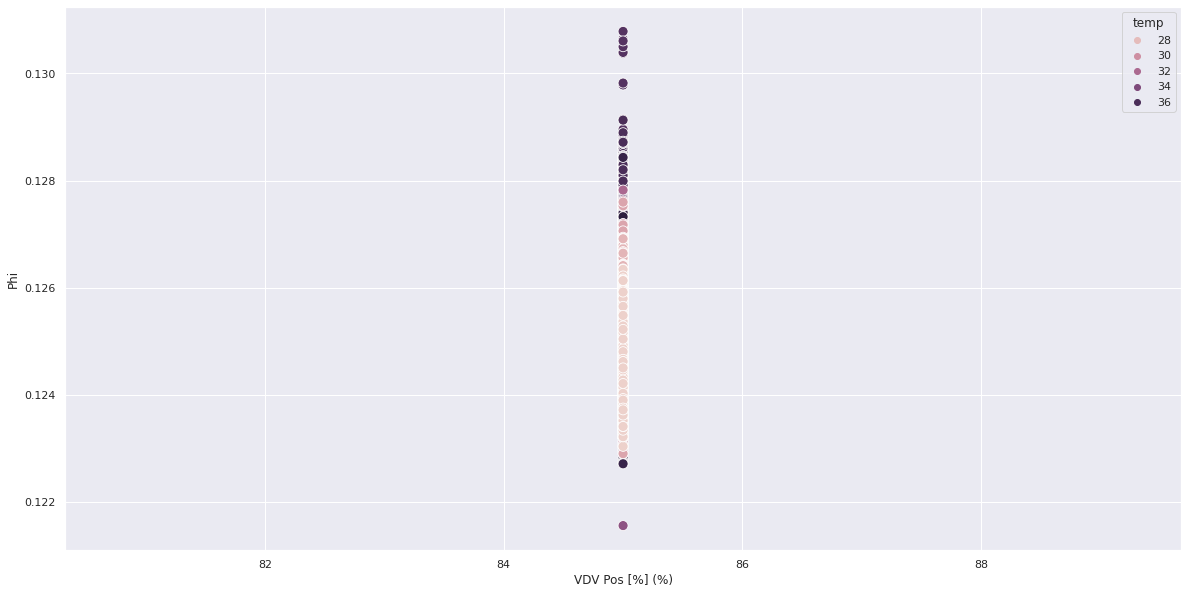

88.0


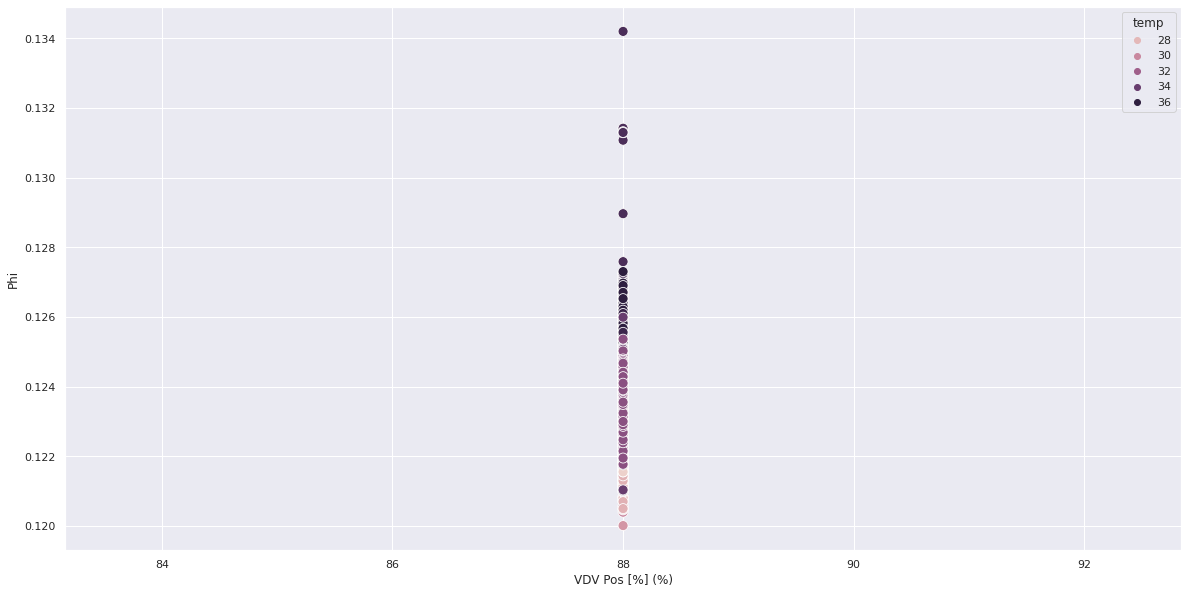

89.0


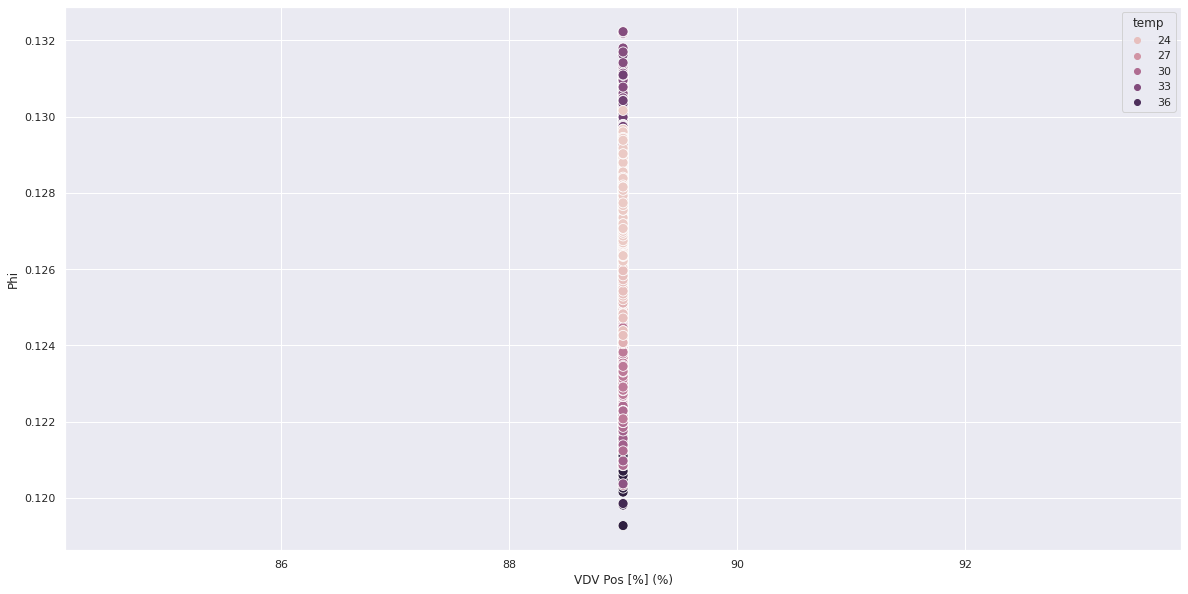

90.0


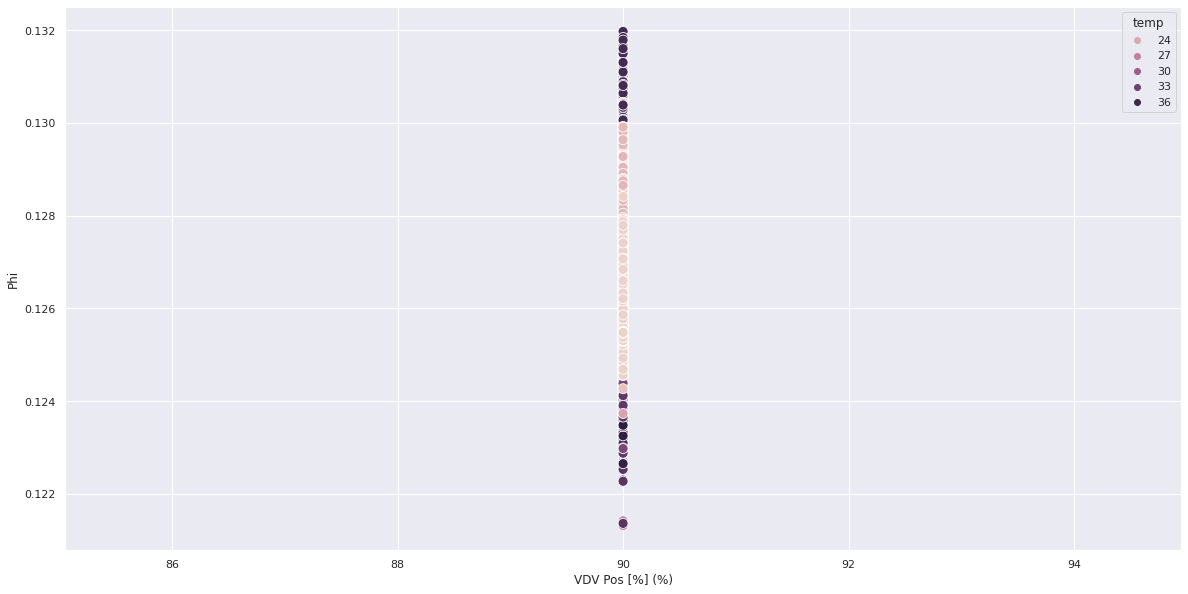

91.0


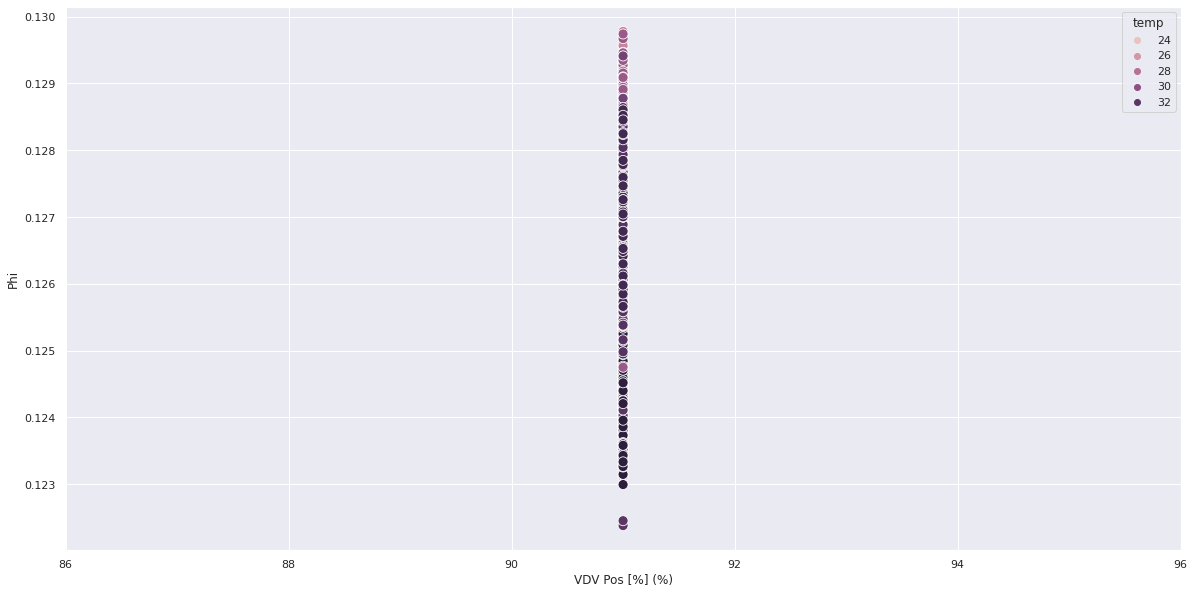

94.0


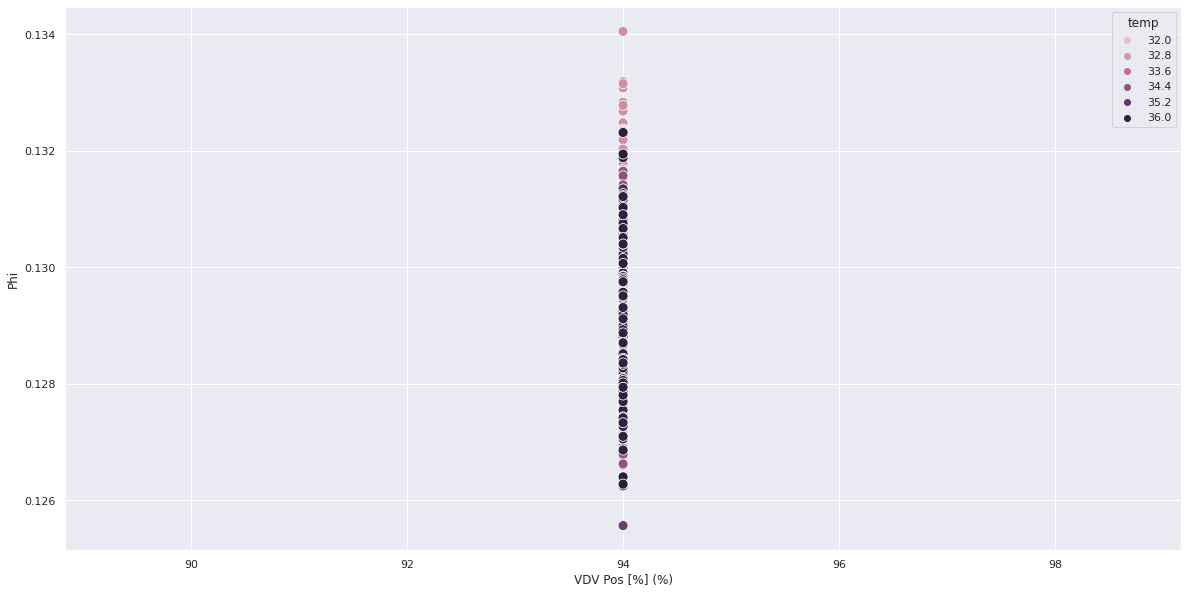

95.0


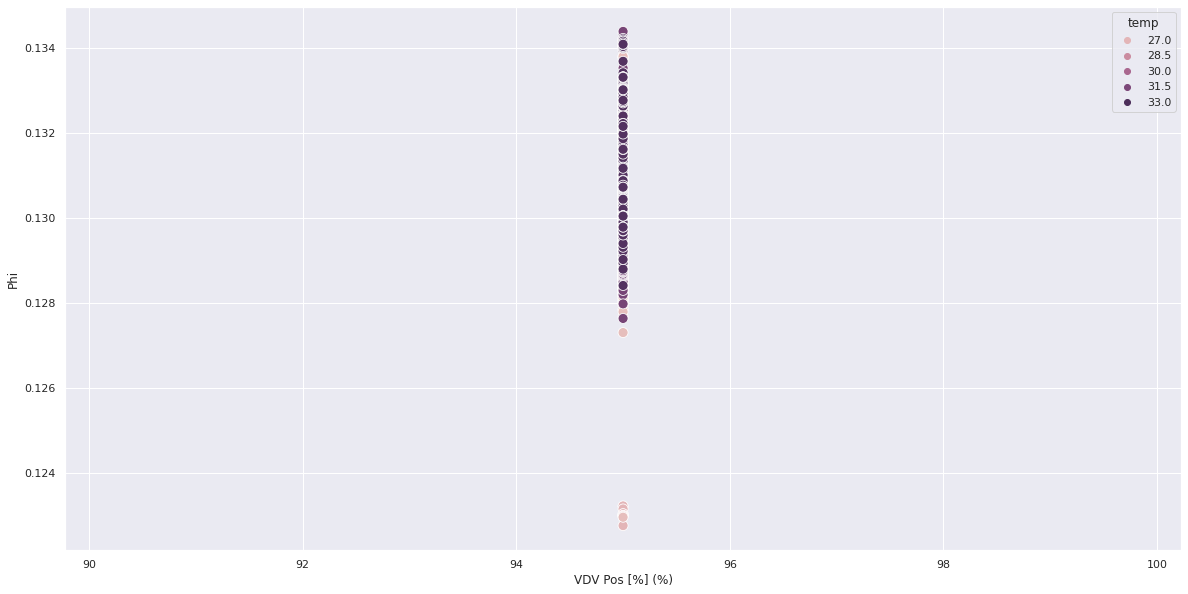

96.0


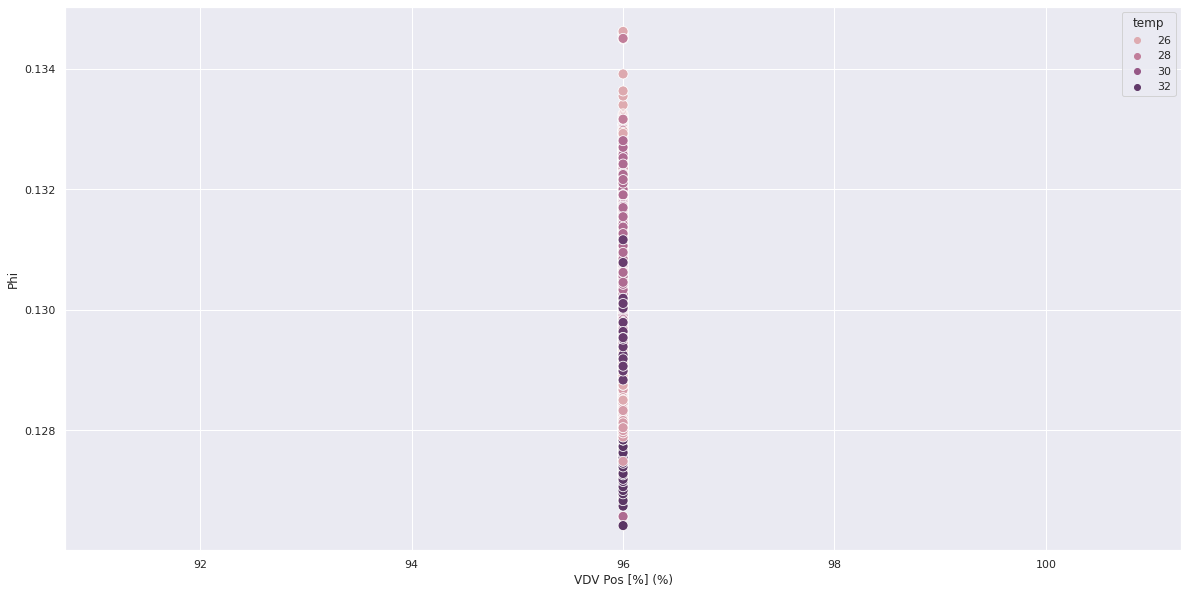

99.0


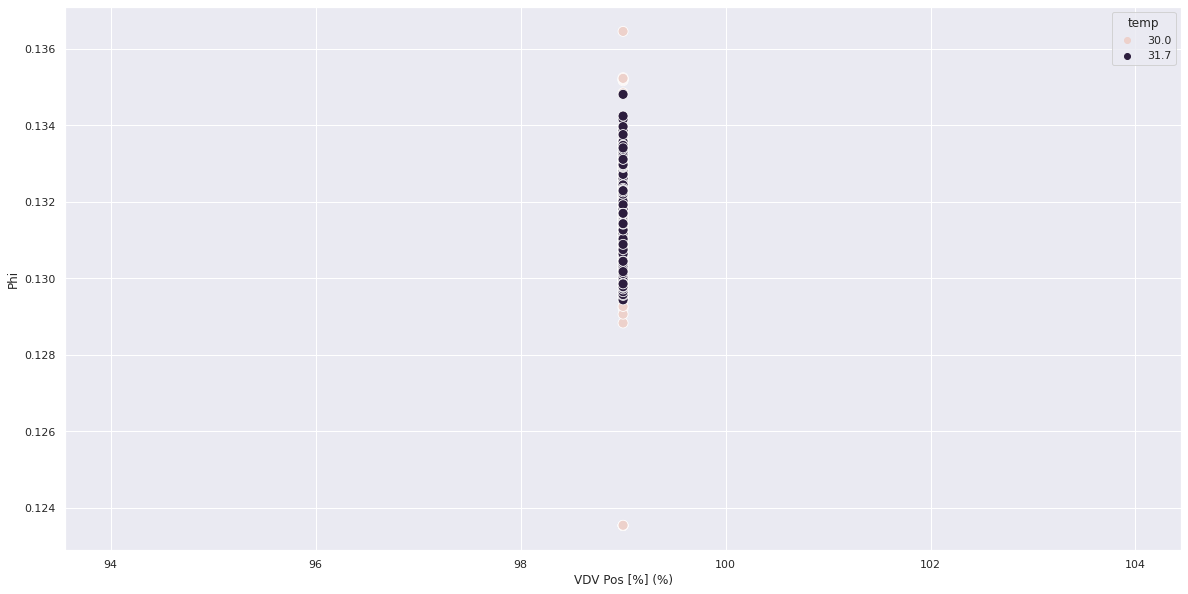

100.0


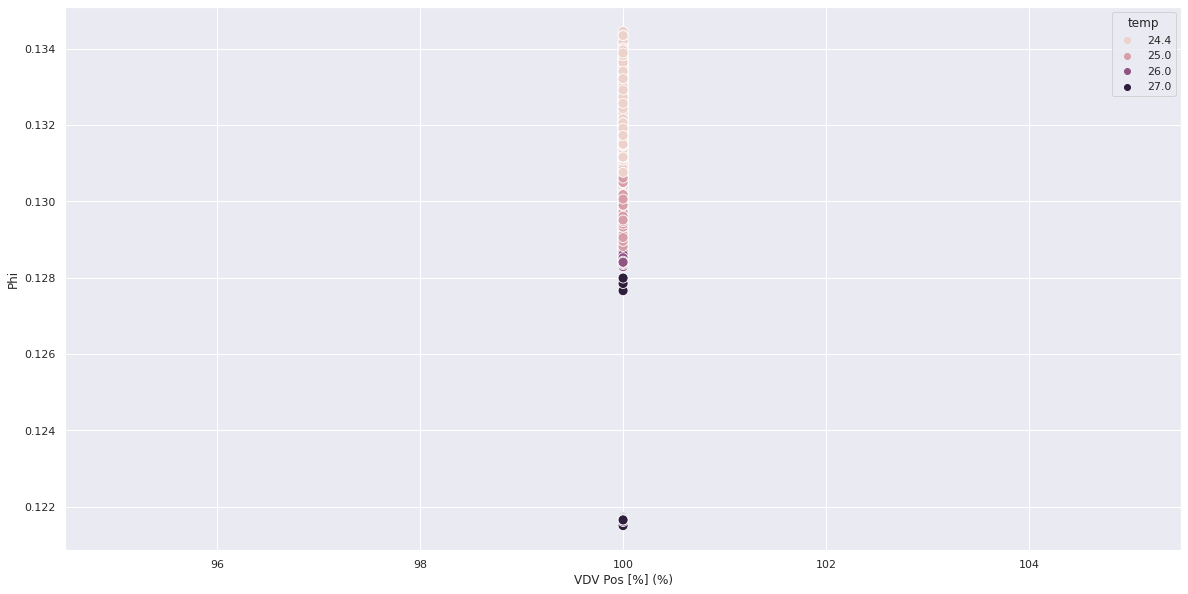

In [12]:
unique = df.groupby(['VDV Pos [%] (%)']).size().reset_index()
unique = unique.rename(columns={0:'Count'})
for i in range(0, len(unique)):
            if(unique['Count'][i]>100):
                IGV = unique["VDV Pos [%] (%)"][i]
#                 VVD = unique["VDV Pos [%] (%)"][i]
                print(IGV)
                wholedf = df.loc[(df["VDV Pos [%] (%)"] == IGV)]
                sns.scatterplot(data=wholedf, x="VDV Pos [%] (%)", y="Phi", hue="temp", s=100)
                plt.show()

<AxesSubplot:>

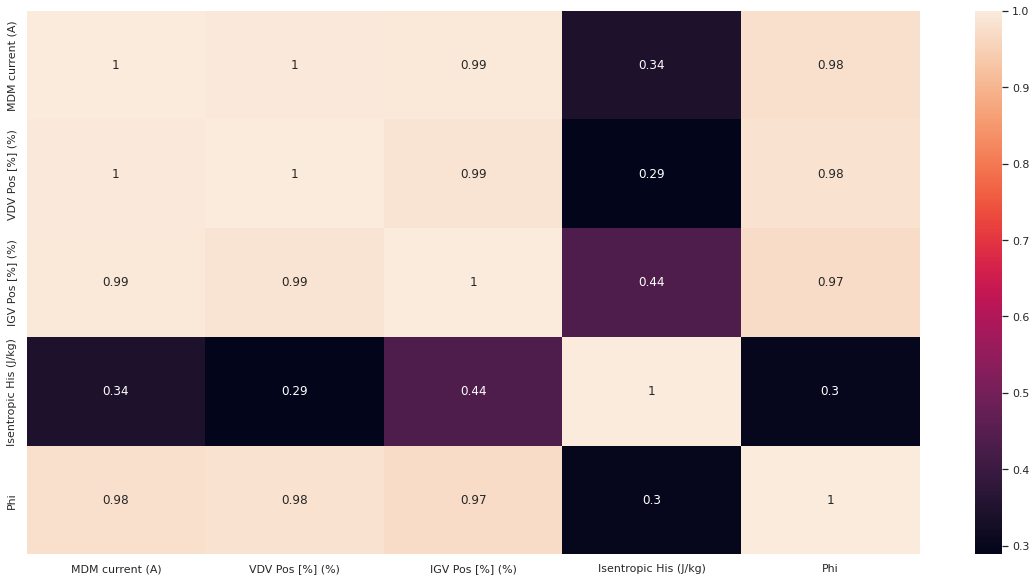

In [13]:
sns.heatmap(df.corr(), annot=True)